In [146]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]
plt.style.use('ggplot')
import os
import pandas as pd
import numpy as np 
import pickle as pk
import glob
from fbprophet import Prophet
import sys
sys.path.append('../')
import wiki
from wiki import utils
from wiki.newphet import load_prophet_prop
import multiprocessing as mp
total_proc = None
from tqdm import tqdm
from IPython.display import clear_output

In [148]:
def load_plot(page, plot_y_org=True):
    forecast = pd.read_feather(PROPHET_PATH+VERSION+page+'df.f')
    print('VERSION',forecast.ds.max())
    wiki.newphet.prophet_plot(forecast, plot_y_org=plot_y_org)
    plt.show()
    forecast = pd.read_feather(PROPHET_PATH+YVERSION+page+'df.f')
    print('YVERSION',forecast.ds.max())
    print('YVERSION train == 0, ds.min()', forecast[forecast.train ==0].ds.min())
    print('YVERSION train == 0, ds.max()', forecast[forecast.train ==0].ds.max())
    wiki.newphet.prophet_plot(forecast, plot_y_org=plot_y_org)
    plt.show()

In [149]:
#full_df = pd.read_csv('../data/train_2.csv');full_df.head()
#full_df = full_df.drop('Page',axis=1)
#full_df.to_feather('../data/train.f')

new_train = pd.read_csv('../data/train_2.csv')
old_train = pd.read_csv('../data/train_2old.csv')
ali_train = pd.read_csv('../data/ali_train_2.csv')
(old_train.Page == new_train.Page).sum()
(ali_train.Page == new_train.Page).sum()

In [150]:
PROPHET_PATH = '../data/prophet/'
CACHE_PATH = 'cache/'
RESULTS_PATH = 'results/'
VERSION ='v7f/'
YVERSION ='v7fy/'
FINAL = True

In [151]:
test_df = pd.read_feather(PROPHET_PATH+RESULTS_PATH+VERSION[:-1]+'df.f'); 
test_df.page_index = test_df.page_index.astype(int)
print(test_df[VERSION[:-1]+'_train'].mean())
test_df = test_df.sort_values(by='page_index').reset_index().drop('index', axis=1)
#test_df = test_df.drop(VERSION[:-1]+'_train', axis=1)
print(test_df.shape)
print(test_df.info())
print(test_df[VERSION[:-1]+'_val'].mean())
test_df.head()

67.2276808221
(145063, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Data columns (total 3 columns):
page_index    145063 non-null int64
v7f_train     145063 non-null float64
v7f_val       0 non-null float64
dtypes: float64(2), int64(1)
memory usage: 3.3 MB
None
nan


page_index  v7f_train  v7f_val
0           0  45.523519      NaN
1           1  51.148421      NaN
2           2  68.165168      NaN
3           3  44.508590      NaN
4           4  63.366684      NaN

In [152]:
Ytest_df = pd.read_feather(PROPHET_PATH+RESULTS_PATH+YVERSION[:-1]+'df.f'); 
Ytest_df.page_index = Ytest_df.page_index.astype(int)
print(Ytest_df[YVERSION[:-1]+'_train'].mean())
Ytest_df = Ytest_df.sort_values(by='page_index').reset_index().drop('index', axis=1)
#Ytest_df = Ytest_df.drop(VERSION[:-1]+'_train', axis=1)
print(Ytest_df.shape)
print(Ytest_df.info())
print(Ytest_df[YVERSION[:-1]+'_val'].mean())
Ytest_df.head()

65.3604280356
(145063, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Data columns (total 3 columns):
page_index    145063 non-null int64
v7fy_train    145054 non-null float64
v7fy_val      143032 non-null float64
dtypes: float64(2), int64(1)
memory usage: 3.3 MB
None
81.4048967973


page_index  v7fy_train    v7fy_val
0           0   46.067779   52.132392
1           1   50.509930   44.648623
2           2   69.963561   49.151591
3           3   43.658403   64.134677
4           4   62.534797  155.495860

page_index    88510.000000
v7f_train       194.427812
v7f_val                NaN
Name: 88510, dtype: float64
VERSION 2017-11-13 00:00:00


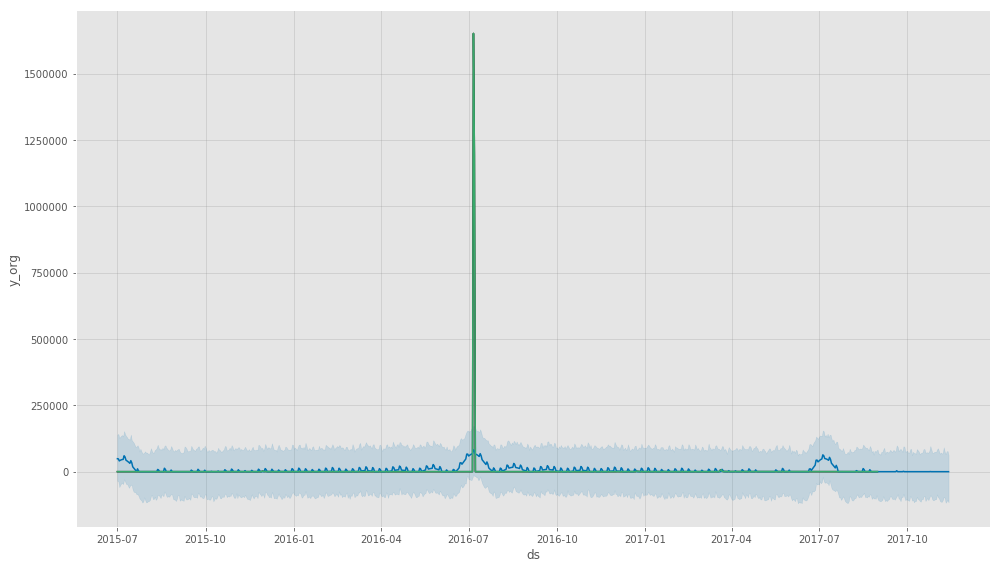

YVERSION 2017-08-31 00:00:00
YVERSION train == 0, ds.min() 2016-09-13 00:00:00
YVERSION train == 0, ds.max() 2016-11-13 00:00:00


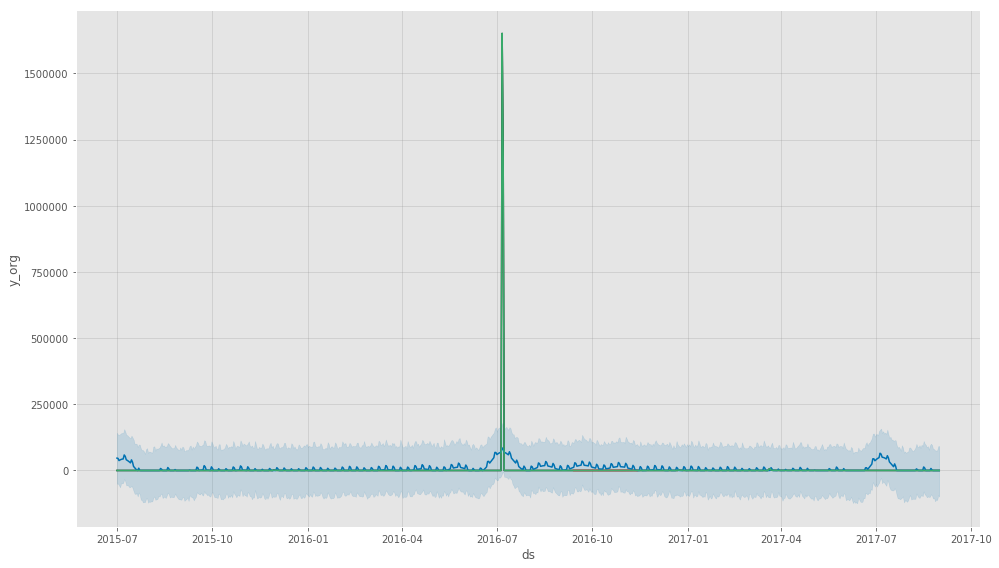

In [153]:
# best
for row in test_df.sample().iterrows():
    print(row[1])
    load_plot(str(int(row[1][0])))

In [154]:
ds = pd.DataFrame(pd.date_range('2017-09-13', '2017-11-13'), columns=['ds']); ds

ds
0  2017-09-13
1  2017-09-14
2  2017-09-15
3  2017-09-16
4  2017-09-17
5  2017-09-18
6  2017-09-19
7  2017-09-20
8  2017-09-21
9  2017-09-22
10 2017-09-23
11 2017-09-24
12 2017-09-25
13 2017-09-26
14 2017-09-27
15 2017-09-28
16 2017-09-29
17 2017-09-30
18 2017-10-01
19 2017-10-02
20 2017-10-03
21 2017-10-04
22 2017-10-05
23 2017-10-06
24 2017-10-07
25 2017-10-08
26 2017-10-09
27 2017-10-10
28 2017-10-11
29 2017-10-12
..        ...
32 2017-10-15
33 2017-10-16
34 2017-10-17
35 2017-10-18
36 2017-10-19
37 2017-10-20
38 2017-10-21
39 2017-10-22
40 2017-10-23
41 2017-10-24
42 2017-10-25
43 2017-10-26
44 2017-10-27
45 2017-10-28
46 2017-10-29
47 2017-10-30
48 2017-10-31
49 2017-11-01
50 2017-11-02
51 2017-11-03
52 2017-11-04
53 2017-11-05
54 2017-11-06
55 2017-11-07
56 2017-11-08
57 2017-11-09
58 2017-11-10
59 2017-11-11
60 2017-11-12
61 2017-11-13

[62 rows x 1 columns]

In [155]:
len(ds)

62

In [156]:
df = Ytest_df.merge(test_df, on='page_index'); print(df.shape); df.head()

(145063, 5)


page_index  v7fy_train    v7fy_val  v7f_train  v7f_val
0           0   46.067779   52.132392  45.523519      NaN
1           1   50.509930   44.648623  51.148421      NaN
2           2   69.963561   49.151591  68.165168      NaN
3           3   43.658403   64.134677  44.508590      NaN
4           4   62.534797  155.495860  63.366684      NaN

In [157]:
mediandf = pd.read_feather('../data/median_for_120_60.f') 

In [158]:
df['nans_start_to_120'] = mediandf.nans_start_to_120

In [159]:
median_rolling = wiki.val.load_median_rolling(FINAL=True); median_rolling.head()
median_rolling_smape = wiki.val.load_median_rolling_smape(FINAL=True); median_rolling_smape.head()

median_rolling_smape indexing ::: index -> smape for that following (non_inclusive) 60 days period
(df.smape_60_to_0.fillna(-1) == median_rolling_smape.iloc[:,-60].fillna(-1)).sum() -> 145063


2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0         NaN   59.292576   47.521198   42.279365   43.644768   45.184539   
1         NaN   73.260387   69.616005   67.684029   68.770630   69.095268   
2         NaN   99.293651  180.000000   99.626984  101.293651  100.341270   
3         NaN   88.967936   70.416485   56.959173   69.960825   55.197029   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10     ...      2017-09-01  \
0   43.202023   41.268254   42.592001   44.607579     ...       33.606054   
1   70.576750   71.639287   71.655954   74.052468     ...       48.403355   
2  100.722222   99.388889   99.388889   99.055556     ...       53.714286   
3   60.669316   53.567910   52.966730   54.192555     ...       57.053343   
4         NaN         NaN         NaN         NaN     ...       34.406884   

   2017-09-02  2017-09-03  2017-09-04  2017-09-05  2017-09-06  2017-09-07  \
0   35.714044   35.178299   34.489485   36.904399   42.343606   42.359821   
1   48.117018   48.519400   47.831695   55.803645   45.095798   50.814192   
2   37.652718   37.359307   34.904143   29.610390   35.532468   30.779221   
3   55.985196   59.195466   63.322957   66.630407   63.956488   76.612277   
4   38.229871   43.008605   47.333106   44.965546   52.287539   60.597519   

   2017-09-08  2017-09-09  2017-09-10  
0   47.329435   68.771930   53.333333  
1   59.056603   81.608161  120.792079  
2   31.515152   47.272727   18.181818  
3   92.048692  101.290963  115.789474  
4   68.030735   86.894587   92.307692  

[5 rows x 803 columns]

In [160]:
print(median_rolling.shape)
print(median_rolling_smape.shape)

(145063, 803)
(145063, 803)


In [161]:
median_rolling.iloc[:,-1].head()

0    23
1    20
2     5
3    15
4    19
Name: 2017-09-10, dtype: int64

In [162]:
median_rolling.iloc[:,-1-365+2].head()

0    20
1    24
2     5
3    13
4     3
Name: 2016-09-12, dtype: int64

In [163]:
df['prevYear_med_pred'] = median_rolling.iloc[:,-1-365+2]

In [164]:
df['prevYear_med_smape'] = median_rolling_smape.iloc[:,-1-365+2]

In [165]:
df['Ytest_gain'] = df['prevYear_med_smape'] - df[YVERSION[:-1]+'_val']; df.head()

page_index  v7fy_train    v7fy_val  v7f_train  v7f_val  nans_start_to_120  \
0           0   46.067779   52.132392  45.523519      NaN                  0   
1           1   50.509930   44.648623  51.148421      NaN                  0   
2           2   69.963561   49.151591  68.165168      NaN                  0   
3           3   43.658403   64.134677  44.508590      NaN                  0   
4           4   62.534797  155.495860  63.366684      NaN                291   

   prevYear_med_pred  prevYear_med_smape  Ytest_gain  
0                 20           40.734290  -11.398102  
1                 24           43.403971   -1.244652  
2                  5           51.406556    2.254965  
3                 13           43.216240  -20.918437  
4                  3           82.530041  -72.965820

In [166]:
df[df['Ytest_gain'] > 200]

Empty DataFrame
Columns: [page_index, v7fy_train, v7fy_val, v7f_train, v7f_val, nans_start_to_120, prevYear_med_pred, prevYear_med_smape, Ytest_gain]
Index: []

In [167]:
df['Ytest_gain'].mean() # was -34 in test version so ok I think

-30.575197189656667

In [168]:
df.head()

page_index  v7fy_train    v7fy_val  v7f_train  v7f_val  nans_start_to_120  \
0           0   46.067779   52.132392  45.523519      NaN                  0   
1           1   50.509930   44.648623  51.148421      NaN                  0   
2           2   69.963561   49.151591  68.165168      NaN                  0   
3           3   43.658403   64.134677  44.508590      NaN                  0   
4           4   62.534797  155.495860  63.366684      NaN                291   

   prevYear_med_pred  prevYear_med_smape  Ytest_gain  
0                 20           40.734290  -11.398102  
1                 24           43.403971   -1.244652  
2                  5           51.406556    2.254965  
3                 13           43.216240  -20.918437  
4                  3           82.530041  -72.965820

In [169]:
yhat =  wiki.newphet.load_prophet_prop(VERSION,'yhat')

In [170]:
yhat.head()

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        19.0        15.0        17.0        16.0        15.0        12.0   
1        35.0        35.0        46.0        45.0        40.0        39.0   
2         3.0         1.0         0.0         1.0         1.0         1.0   
3        25.0        22.0        22.0        22.0        20.0        23.0   
4        14.0        15.0        13.0        17.0        15.0        12.0   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10     ...      2017-09-01  \
0        14.0        14.0        10.0        12.0     ...            26.0   
1        45.0        41.0        38.0        47.0     ...            45.0   
2         0.0         3.0         0.0         0.0     ...             5.0   
3        21.0        22.0        19.0        20.0     ...            15.0   
4         8.0        12.0        13.0        11.0     ...            21.0   

   2017-09-02  2017-09-03  2017-09-04  2017-09-05  2017-09-06  2017-09-07  \
0        25.0        25.0        22.0        24.0        23.0        20.0   
1        42.0        35.0        33.0        39.0        34.0        32.0   
2         6.0         6.0         6.0         5.0         7.0         5.0   
3        15.0        13.0        15.0        13.0        14.0        11.0   
4        26.0        24.0        23.0        20.0        25.0        26.0   

   2017-09-08  2017-09-09  2017-09-10  
0        22.0        21.0        21.0  
1        41.0        39.0        32.0  
2         4.0         5.0         5.0  
3        12.0        12.0        10.0  
4        26.0        30.0        28.0  

[5 rows x 803 columns]

In [171]:
yhat.shape

(145063, 803)

In [172]:
yhat_rolling_smape =  wiki.val.load_prophet_rolling_smape(VERSION)

prophet_rolling_smape indexing ::: index -> smape for that following (non_inclusive) 60 days period
(df.v7t_val.round(decimals=6).fillna(-10) == yhat_rolling_smape.iloc[:,-60].round(decimals=6).fillna(-10)).sum() -> 145063


In [173]:
print(yhat_rolling_smape.max().max())
print(yhat_rolling_smape.min().min())

200.0
0.0


In [174]:
print(yhat_rolling_smape.shape)
print(median_rolling_smape.shape)

(145063, 743)
(145063, 803)


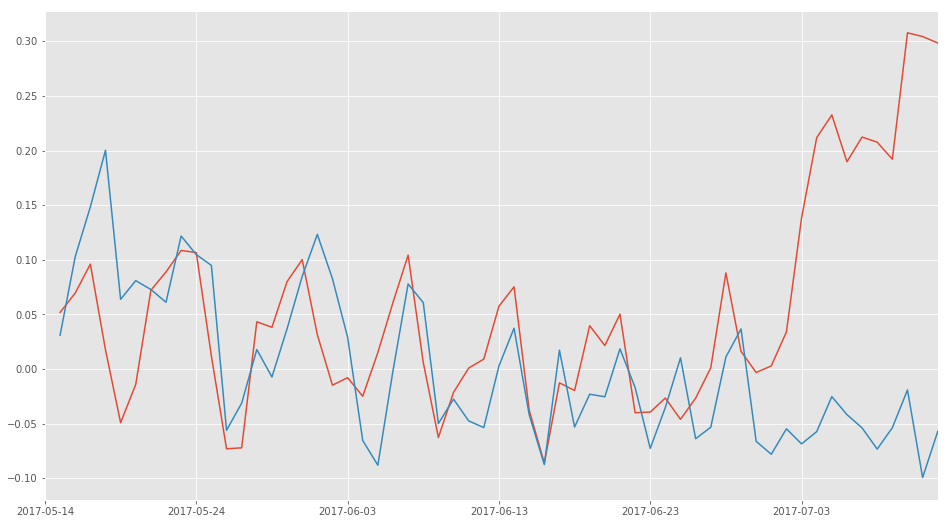

In [175]:
yhat_rolling_smape.iloc[:,-120:-60].diff(1, axis=1).mean(axis=0).plot()
median_rolling_smape.iloc[:,-120:-60].diff(1, axis=1).mean(axis=0).plot()

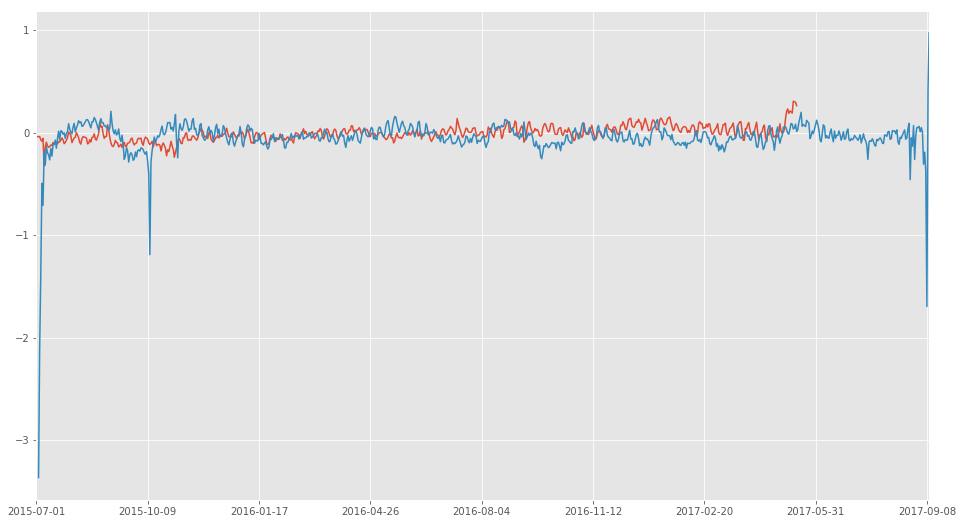

In [176]:
yhat_rolling_smape.iloc[:,:].diff(1, axis=1).mean(axis=0).plot()
median_rolling_smape.iloc[:,:].diff(1, axis=1).mean(axis=0).plot()

In [177]:
yhat_rolling_smape.shape

(145063, 743)

In [178]:
median_rolling_smape.shape

(145063, 803)

In [179]:
yhat_rolling_smape.iloc[:,-60:].head()

2017-07-13  2017-07-14  2017-07-15  2017-07-16  2017-07-17  2017-07-18  \
0    33.94451         NaN         NaN         NaN         NaN         NaN   
1    58.47359         NaN         NaN         NaN         NaN         NaN   
2    55.22765         NaN         NaN         NaN         NaN         NaN   
3    35.19870         NaN         NaN         NaN         NaN         NaN   
4    46.83045         NaN         NaN         NaN         NaN         NaN   

   2017-07-19  2017-07-20  2017-07-21  2017-07-22     ...      2017-09-01  \
0         NaN         NaN         NaN         NaN     ...             NaN   
1         NaN         NaN         NaN         NaN     ...             NaN   
2         NaN         NaN         NaN         NaN     ...             NaN   
3         NaN         NaN         NaN         NaN     ...             NaN   
4         NaN         NaN         NaN         NaN     ...             NaN   

   2017-09-02  2017-09-03  2017-09-04  2017-09-05  2017-09-06  2017-09-07  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2017-09-08  2017-09-09  2017-09-10  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN         NaN         NaN  
4         NaN         NaN         NaN  

[5 rows x 60 columns]

In [180]:
median_rolling_smape.head()

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0         NaN   59.292576   47.521198   42.279365   43.644768   45.184539   
1         NaN   73.260387   69.616005   67.684029   68.770630   69.095268   
2         NaN   99.293651  180.000000   99.626984  101.293651  100.341270   
3         NaN   88.967936   70.416485   56.959173   69.960825   55.197029   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10     ...      2017-09-01  \
0   43.202023   41.268254   42.592001   44.607579     ...       33.606054   
1   70.576750   71.639287   71.655954   74.052468     ...       48.403355   
2  100.722222   99.388889   99.388889   99.055556     ...       53.714286   
3   60.669316   53.567910   52.966730   54.192555     ...       57.053343   
4         NaN         NaN         NaN         NaN     ...       34.406884   

   2017-09-02  2017-09-03  2017-09-04  2017-09-05  2017-09-06  2017-09-07  \
0   35.714044   35.178299   34.489485   36.904399   42.343606   42.359821   
1   48.117018   48.519400   47.831695   55.803645   45.095798   50.814192   
2   37.652718   37.359307   34.904143   29.610390   35.532468   30.779221   
3   55.985196   59.195466   63.322957   66.630407   63.956488   76.612277   
4   38.229871   43.008605   47.333106   44.965546   52.287539   60.597519   

   2017-09-08  2017-09-09  2017-09-10  
0   47.329435   68.771930   53.333333  
1   59.056603   81.608161  120.792079  
2   31.515152   47.272727   18.181818  
3   92.048692  101.290963  115.789474  
4   68.030735   86.894587   92.307692  

[5 rows x 803 columns]

In [182]:
cut_off = None
df['rolling_gain_mean'] = (median_rolling_smape.iloc[:,:cut_off] - yhat_rolling_smape.iloc[:,:cut_off]).mean(axis=1)
df['rolling_gain_std'] = (median_rolling_smape.iloc[:,:cut_off] - yhat_rolling_smape.iloc[:,:cut_off]).std(axis=1)

In [183]:
print(df['rolling_gain_mean'].max(), df['rolling_gain_mean'].min())
print(df['rolling_gain_std'].max(), df['rolling_gain_std'].min())

200.0 -192.75231767
172.734306215 0.0


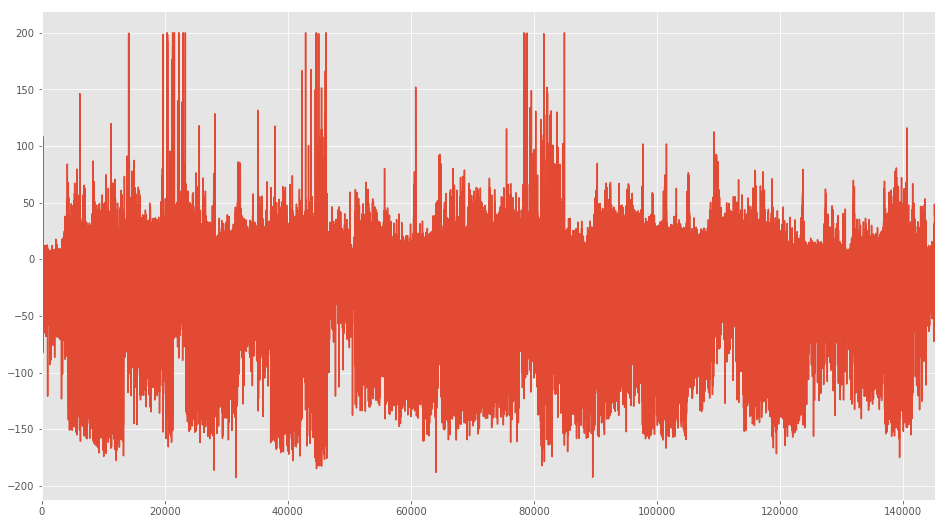

In [184]:
df['rolling_gain_mean'].plot()

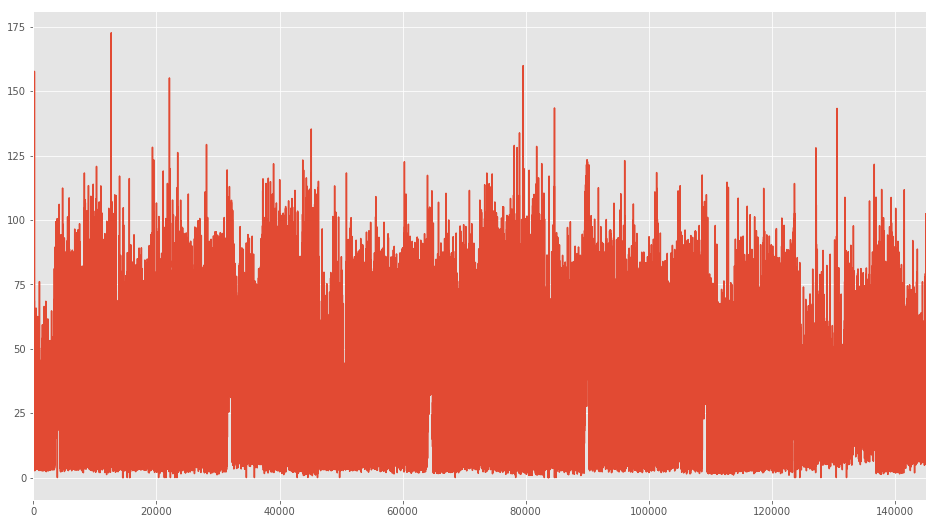

In [185]:
df['rolling_gain_std'].plot()

# Filter CV

In [220]:
#v1{'a': 1.5, 'b': 2.0, 'c': 8.0, 'd': 0}
filter_df = ((df['rolling_gain_std']*1.5 < df['rolling_gain_mean']*2) &
            (df['Ytest_gain'] > 6) &
             (df['nans_start_to_120'] <= 0)
             )
print(len(df[filter_df]))

8993


In [218]:
df[filter_df]['Ytest_gain'].mean()

28.891533206365938

In [211]:
test_pages = pd.read_feather(
    '../data/prophet/results/proph_FINAL_test_smape.f')

In [221]:
test_pages.page_index.isin(predss.index).sum()

4121

In [222]:
len(test_pages)

5467

In [223]:
len(predss)

8227

In [224]:
predss.index.isin(test_pages.page_index).sum()

4121

In [225]:
len(filter_df)

145063

# Saving Results 

# Shift preds

In [226]:
y_df = wiki.newphet.load_prophet_prop(VERSION, 'y')

In [227]:
y_df.head()

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   
1        11.0        14.0        15.0        18.0        11.0        13.0   
2         1.0         0.0         1.0         1.0         0.0         4.0   
3        35.0        13.0        10.0        94.0         4.0        26.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10     ...      2017-09-01  \
0         9.0        22.0        26.0        24.0     ...             NaN   
1        22.0        11.0        10.0         4.0     ...             NaN   
2         0.0         3.0         4.0         4.0     ...             NaN   
3        14.0         9.0        11.0        16.0     ...             NaN   
4         NaN         NaN         NaN         NaN     ...             NaN   

   2017-09-02  2017-09-03  2017-09-04  2017-09-05  2017-09-06  2017-09-07  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2017-09-08  2017-09-09  2017-09-10  
0         NaN         NaN         NaN  
1         NaN         NaN         NaN  
2         NaN         NaN         NaN  
3         NaN         NaN         NaN  
4         NaN         NaN         NaN  

[5 rows x 803 columns]

In [228]:
train = pd.read_feather('../data/train.f')

In [229]:
predss = y_df[filter_df]; predss

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  \
930            2.0         2.0         5.0         9.0         1.0   
957            8.0        11.0        11.0         8.0        20.0   
1302           4.0         8.0         4.0         5.0         4.0   
1498          21.0        11.0        15.0        18.0        15.0   
1711           4.0        15.0         4.0        11.0        15.0   
1973          64.0        20.0        30.0       171.0        82.0   
2033           2.0         1.0         5.0         4.0         1.0   
2324           2.0        18.0        10.0        16.0         7.0   
2838           2.0         6.0         3.0         5.0         2.0   
3136           2.0         4.0         5.0         9.0        13.0   
3288         206.0       379.0       136.0       871.0       267.0   
4311         421.0       438.0       351.0       259.0       329.0   
4314         250.0       200.0       179.0       183.0       204.0   
4327         250.0       228.0       241.0       228.0       186.0   
4328         303.0       291.0       259.0       151.0       168.0   
4330         483.0       476.0       375.0       231.0       196.0   
4331         584.0       570.0       457.0       205.0       183.0   
4335         983.0       905.0       993.0       865.0       824.0   
4336         511.0       483.0       399.0       260.0       272.0   
4338         381.0       489.0       336.0       281.0       245.0   
4346         266.0       295.0       227.0       270.0       259.0   
4348         963.0      1031.0      1001.0      2428.0       950.0   
4351         605.0       484.0       324.0       264.0       225.0   
4353         700.0       714.0       663.0       583.0       422.0   
4355         478.0       476.0       431.0       359.0       400.0   
4356         310.0       363.0       309.0       296.0       340.0   
4365        1025.0       860.0       515.0       395.0       506.0   
4366         922.0       892.0       716.0       800.0       708.0   
4374         331.0       311.0       347.0       321.0       409.0   
4375         372.0       369.0       253.0       219.0       253.0   
...            ...         ...         ...         ...         ...   
141129      3099.0      2870.0      2417.0      2157.0      2976.0   
141143       790.0       636.0       760.0       690.0       677.0   
141173      1161.0      1195.0      1140.0       870.0      1175.0   
141178      1396.0      1478.0      1663.0      1980.0      2337.0   
141185      1719.0      1568.0      1265.0      1061.0      1427.0   
141188      1262.0      1250.0      1040.0       908.0      1151.0   
141200      1935.0      1874.0      1614.0      1359.0      1709.0   
141207       749.0       701.0       708.0       691.0       669.0   
141211      1852.0      1668.0      1662.0      1876.0      2085.0   
141216      1078.0       969.0       892.0       644.0      1120.0   
141224      1161.0      1113.0      1167.0       819.0      1081.0   
141238       620.0       640.0       544.0       674.0       759.0   
141244      2663.0      2468.0      3088.0      1570.0      2188.0   
141249      1308.0      1278.0      1232.0      1322.0      1395.0   
141262       752.0       886.0       814.0       714.0       825.0   
141273       443.0       427.0       514.0       743.0       483.0   
141298       923.0       929.0       788.0       758.0       852.0   
141321      1080.0      1057.0       699.0       574.0       918.0   
141353      1905.0      1668.0      1321.0      1161.0      1768.0   
141368      1322.0      1285.0       949.0       565.0       801.0   
141375      1665.0      1590.0      1338.0      1138.0      1798.0   
141377      1038.0      1001.0       890.0       926.0      1136.0   
141392       872.0       920.0       737.0       647.0       819.0   
141407      1022.0      1056.0       861.0       733.0       865.0   
141410      1339.0      1183.0       912.0       749.0      1077.0   
141415      1591.0

In [230]:
ds.ds.min()

Timestamp('2017-09-13 00:00:00')

In [231]:
ds.ds.max()

Timestamp('2017-11-13 00:00:00')

In [232]:
ds_min = ds.ds.min().date()
ds_max = ds.ds.max().date()
print(str(ds_min))
print(str(ds_max))

2017-09-13
2017-11-13


In [233]:
ds.ds.astype(str)

0     2017-09-13
1     2017-09-14
2     2017-09-15
3     2017-09-16
4     2017-09-17
5     2017-09-18
6     2017-09-19
7     2017-09-20
8     2017-09-21
9     2017-09-22
10    2017-09-23
11    2017-09-24
12    2017-09-25
13    2017-09-26
14    2017-09-27
15    2017-09-28
16    2017-09-29
17    2017-09-30
18    2017-10-01
19    2017-10-02
20    2017-10-03
21    2017-10-04
22    2017-10-05
23    2017-10-06
24    2017-10-07
25    2017-10-08
26    2017-10-09
27    2017-10-10
28    2017-10-11
29    2017-10-12
         ...    
32    2017-10-15
33    2017-10-16
34    2017-10-17
35    2017-10-18
36    2017-10-19
37    2017-10-20
38    2017-10-21
39    2017-10-22
40    2017-10-23
41    2017-10-24
42    2017-10-25
43    2017-10-26
44    2017-10-27
45    2017-10-28
46    2017-10-29
47    2017-10-30
48    2017-10-31
49    2017-11-01
50    2017-11-02
51    2017-11-03
52    2017-11-04
53    2017-11-05
54    2017-11-06
55    2017-11-07
56    2017-11-08
57    2017-11-09
58    2017-11-10
59    2017-11-

In [247]:
train = pd.read_csv('../data/train_2.csv')

In [248]:
train_old = pd.read_csv('../data/train_2old.csv')

In [249]:
(train_old.Page == train.Page).sum()

145063

In [252]:
(train_old.Page == train.sample(frac=1).reset_index().Page).sum()

1

In [235]:
trainPreds = train[filter_df].loc[:,'2016-09-14':'2016-11-14']

In [236]:
predictions = y_df[filter_df].loc[:,'2016-09-14':'2016-11-14']

In [237]:
predictions.shape

(8993, 62)

In [238]:
trainPreds.shape

(8993, 62)

In [198]:
trainPreds.head()

2016-09-12  2016-09-13  2016-09-14  2016-09-15  2016-09-16  2016-09-17  \
930          3.0         3.0         5.0         7.0         7.0         6.0   
1498         9.0        14.0        10.0         9.0        11.0         9.0   
1711         7.0        12.0         9.0         8.0        10.0         7.0   
1973        20.0        24.0        30.0        38.0        25.0        98.0   
2033         7.0        10.0         5.0         6.0        12.0         6.0   

      2016-09-18  2016-09-19  2016-09-20  2016-09-21     ...      2016-11-03  \
930          3.0         7.0         6.0        11.0     ...            20.0   
1498        14.0        16.0        22.0        12.0     ...            10.0   
1711        11.0        23.0        10.0         9.0     ...            14.0   
1973        65.0        34.0        25.0        24.0     ...            19.0   
2033         9.0         7.0        12.0         6.0     ...             2.0   

      2016-11-04  2016-11-05  2016-11-06  2016-11-07  2016-11-08  2016-11-09  \
930         17.0         8.0        13.0        20.0         9.0        16.0   
1498         7.0        10.0         7.0        13.0        14.0        14.0   
1711         8.0        11.0        17.0        23.0         8.0         7.0   
1973        19.0       125.0        26.0        22.0        17.0        17.0   
2033         4.0         5.0         4.0         9.0         3.0         8.0   

      2016-11-10  2016-11-11  2016-11-12  
930         30.0        29.0        21.0  
1498        14.0        10.0        12.0  
1711        16.0         7.0        10.0  
1973        20.0        47.0       119.0  
2033         3.0         6.0         6.0  

[5 rows x 62 columns]

In [199]:
trainPreds.equals(predictions)

True

In [200]:
(trainPreds == predictions).sum().value_counts()

8227    62
dtype: int64

In [239]:
predictions.columns = ds.ds.astype(str);
predictions = predictions.reset_index().rename(columns={'index':'page_index'})

In [242]:
predictions

ds    page_index  2017-09-13  2017-09-14  2017-09-15  2017-09-16  2017-09-17  \
0            930         5.0         7.0         7.0         6.0         3.0   
1            957         8.0        12.0        15.0         6.0         7.0   
2           1302        11.0        11.0        11.0        16.0        12.0   
3           1498        10.0         9.0        11.0         9.0        14.0   
4           1711         9.0         8.0        10.0         7.0        11.0   
5           1973        30.0        38.0        25.0        98.0        65.0   
6           2033         5.0         6.0        12.0         6.0         9.0   
7           2324         9.0        16.0         6.0        15.0         9.0   
8           2838         8.0         7.0        10.0         9.0         6.0   
9           3136         8.0        14.0        19.0         4.0         8.0   
10          3288        77.0       170.0       159.0        55.0        40.0   
11          4311       565.0       489.0       467.0       414.0       610.0   
12          4314       267.0       233.0       240.0       284.0      1884.0   
13          4327       777.0       671.0       429.0       433.0       670.0   
14          4328       475.0       428.0       379.0       299.0       443.0   
15          4330       699.0       750.0       560.0       376.0       389.0   
16          4331       812.0       794.0       738.0       249.0       355.0   
17          4335      1452.0      1386.0      1276.0      1149.0      1233.0   
18          4336       674.0       717.0       716.0       376.0       377.0   
19          4338       601.0       578.0       558.0       501.0       651.0   
20          4346       541.0       752.0       610.0       486.0       541.0   
21          4348      1219.0      1082.0      1183.0       918.0       945.0   
22          4351       404.0       386.0       335.0       241.0       246.0   
23          4353       910.0       767.0       638.0       404.0       402.0   
24          4355       545.0       494.0       513.0       330.0       443.0   
25          4356       753.0       703.0       519.0       666.0       545.0   
26          4365       916.0       769.0       804.0       765.0       922.0   
27          4366      1341.0      1507.0      1173.0       972.0      1221.0   
28          4374       474.0       491.0       507.0       395.0       494.0   
29          4375       686.0       630.0       378.0       467.0       589.0   
...          ...         ...         ...         ...         ...         ...   
8963      141129      3152.0      3244.0      3240.0      3328.0      3952.0   
8964      141143      1023.0       852.0       951.0      1394.0      1648.0   
8965      141173      1196.0      1190.0      1258.0      1199.0      1318.0   
8966      141178      1789.0      1663.0      1533.0      1422.0      1576.0   
8967      141185      1597.0      1725.0      1373.0      1117.0      1498.0   
8968      141188      1304.0      1275.0      1039.0      1025.0      1604.0   
8969      141200      1955.0      2001.0      1787.0      1741.0      1899.0   
8970      141207      1166.0       960.0       791.0       725.0       802.0   
8971      141211       928.0       946.0       711.0       692.0       714.0   
8972      141216      1691.0      1358.0      1211.0       701.0      1056.0   
8973      141224      1353.0      1302.0      1071.0       921.0      1069.0   
8974      141238       930.0       915.0       934.0      1219.0      1307.0   
8975      141244      1890.0      1749.0      1623.0       814.0       842.0   
8976      141249      1402.0      1375.0      1570.0      1488.0      1499.0   
8977      141262      1574.0      1741.0      1785.0      1431.0      1501.0   
8978      141273       702.0       569.0       639.0       685.0      2023.0   
8979      141298      1132.0      1109.0      1038.0      1306.0      1674.0   
8980      141321      1980.0      2646.0      1476.0      1165.0      2139.0   


In [244]:
predictions.to_feather('../data/FINALFINAL_PROPHET.f')

In [135]:
predictions.head()

ds  page_index  2017-09-13  2017-09-14  2017-09-15  2017-09-16  2017-09-17  \
0          930         3.0         5.0         7.0         7.0         6.0   
1         1711        12.0         9.0         8.0        10.0         7.0   
2         1973        24.0        30.0        38.0        25.0        98.0   
3         2324         7.0         9.0        16.0         6.0        15.0   
4         2517       114.0       123.0       108.0       108.0       120.0   

ds  2017-09-18  2017-09-19  2017-09-20  2017-09-21     ...      2017-11-04  \
0          3.0         7.0         6.0        11.0     ...            17.0   
1         11.0        23.0        10.0         9.0     ...             8.0   
2         65.0        34.0        25.0        24.0     ...            19.0   
3          9.0         6.0         9.0         9.0     ...             8.0   
4        113.0       111.0        82.0        32.0     ...            45.0   

ds  2017-11-05  2017-11-06  2017-11-07  2017-11-08  2017-11-09  2017-11-10  \
0          8.0        13.0        20.0         9.0        16.0        30.0   
1         11.0        17.0        23.0         8.0         7.0        16.0   
2        125.0        26.0        22.0        17.0        17.0        20.0   
3          6.0        10.0         6.0         7.0         6.0         7.0   
4         38.0        45.0        32.0        39.0        30.0        37.0   

ds  2017-11-11  2017-11-12  2017-11-13  
0         29.0        21.0        11.0  
1          7.0        10.0         9.0  
2         47.0       119.0        37.0  
3         13.0        11.0         6.0  
4         26.0        45.0        34.0  

[5 rows x 63 columns]

In [187]:
# save the pages and val scores
# need to grab yhat here I think
yhat[filter_df].iloc[:,-60:].reset_index().rename(columns={'index':'page_index'}).to_feather(
    #'../data/prophet/results/proph_v7_preds.f')

SyntaxError: unexpected EOF while parsing (<ipython-input-187-24f78de871a1>, line 4)

page_index            6056.000000
v7fy_train              17.759179
v7fy_val                32.714863
v7f_train               19.067218
v7f_val                       NaN
prevYear_med_pred      526.000000
prevYear_med_smape      42.852541
Ytest_gain              10.137679
rolling_gain_mean        7.135747
rolling_gain_std         9.014510
nans_start_to_120        0.000000
Name: 6056, dtype: float64
VERSION 2017-11-13 00:00:00


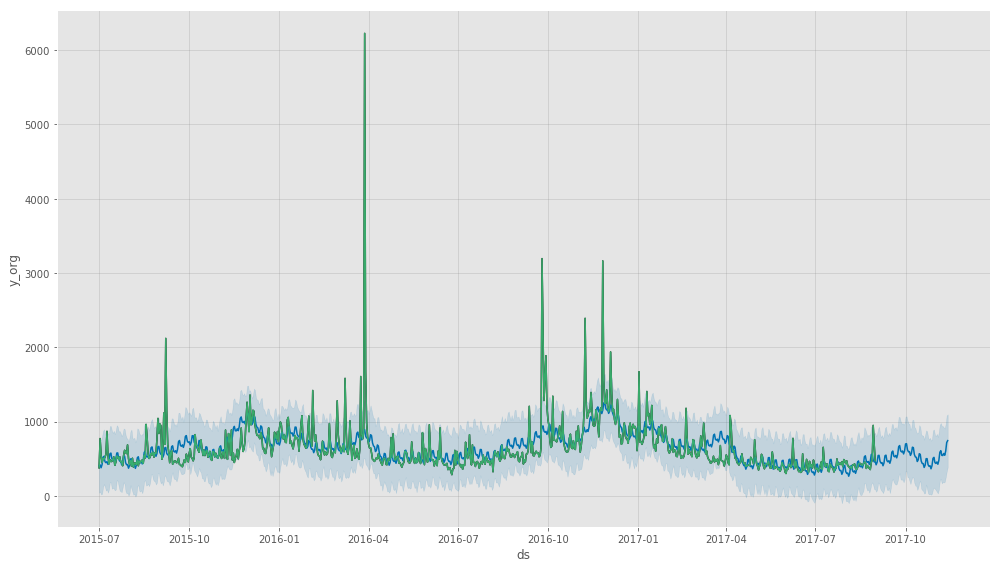

YVERSION 2017-08-31 00:00:00
YVERSION train == 0, ds.min() 2016-09-13 00:00:00
YVERSION train == 0, ds.max() 2016-11-13 00:00:00


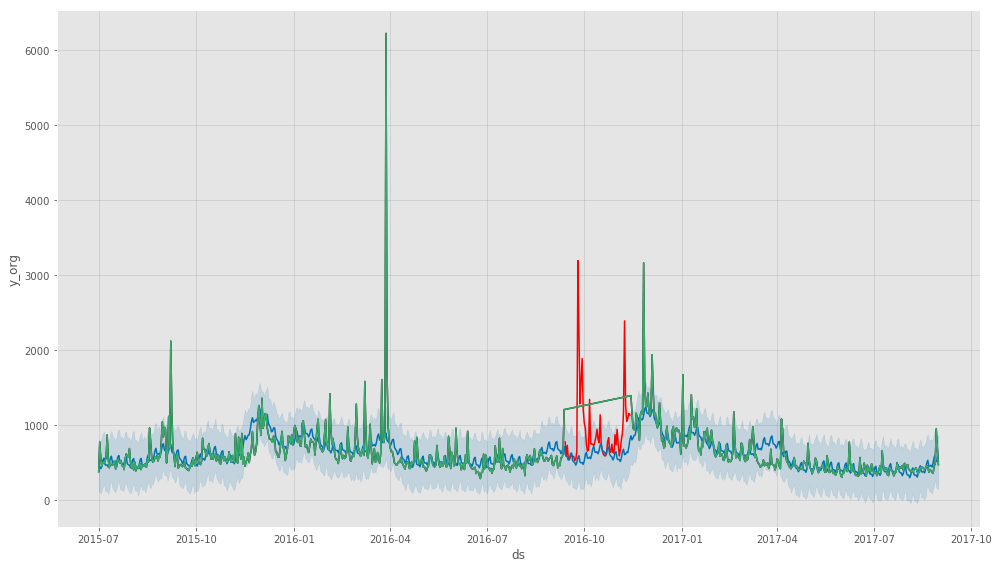

ds   2017-09-13  2017-09-14  2017-09-15  2017-09-16  2017-09-17  2017-09-18  \
258       775.0       582.0       730.0       544.0       540.0       580.0   

ds   2017-09-19  2017-09-20  2017-09-21  2017-09-22     ...      2017-11-04  \
258       603.0       579.0       583.0       528.0     ...           674.0   

ds   2017-11-05  2017-11-06  2017-11-07  2017-11-08  2017-11-09  2017-11-10  \
258       805.0       887.0      1166.0      2391.0      1270.0      1049.0   

ds   2017-11-11  2017-11-12  2017-11-13  
258      1086.0      1156.0      1135.0  

[1 rows x 62 columns]
page_index            71190.000000
v7fy_train               21.379992
v7fy_val                 12.512249
v7f_train                20.595106
v7f_val                        NaN
prevYear_med_pred      5901.000000
prevYear_med_smape       26.203334
Ytest_gain               13.691085
rolling_gain_mean        23.838458
rolling_gain_std         11.681018
nans_start_to_120         0.000000
Name: 71190, dtype: float64
VER

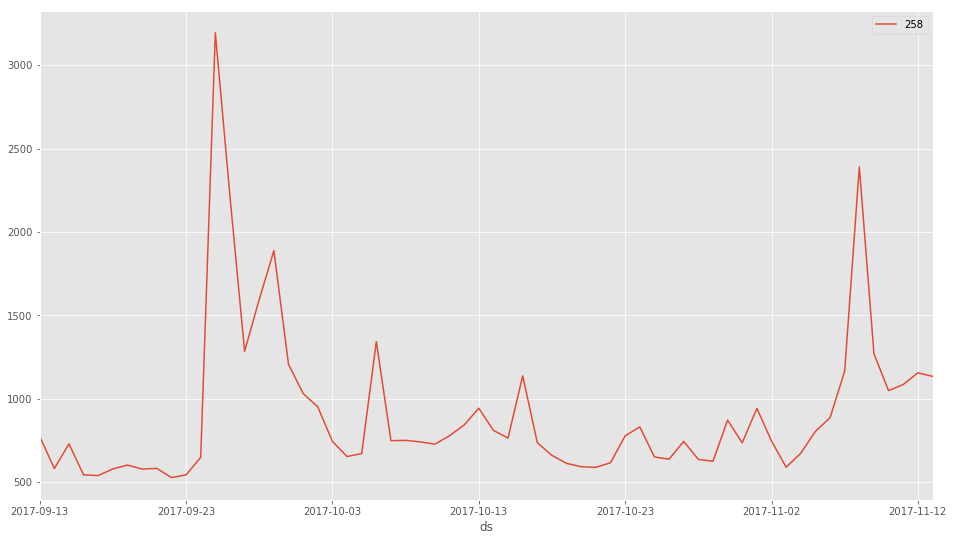

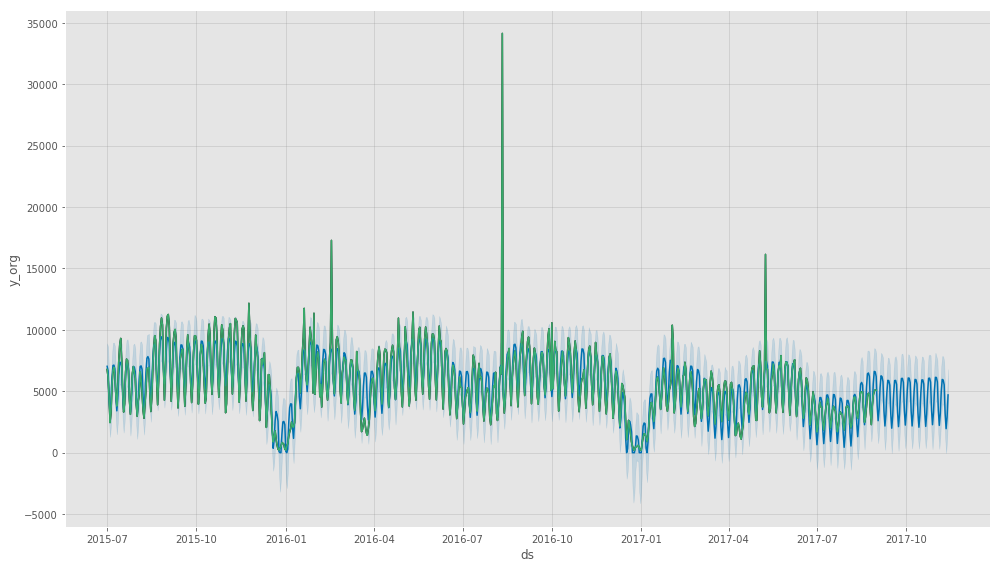

YVERSION 2017-08-31 00:00:00
YVERSION train == 0, ds.min() 2016-09-13 00:00:00
YVERSION train == 0, ds.max() 2016-11-13 00:00:00


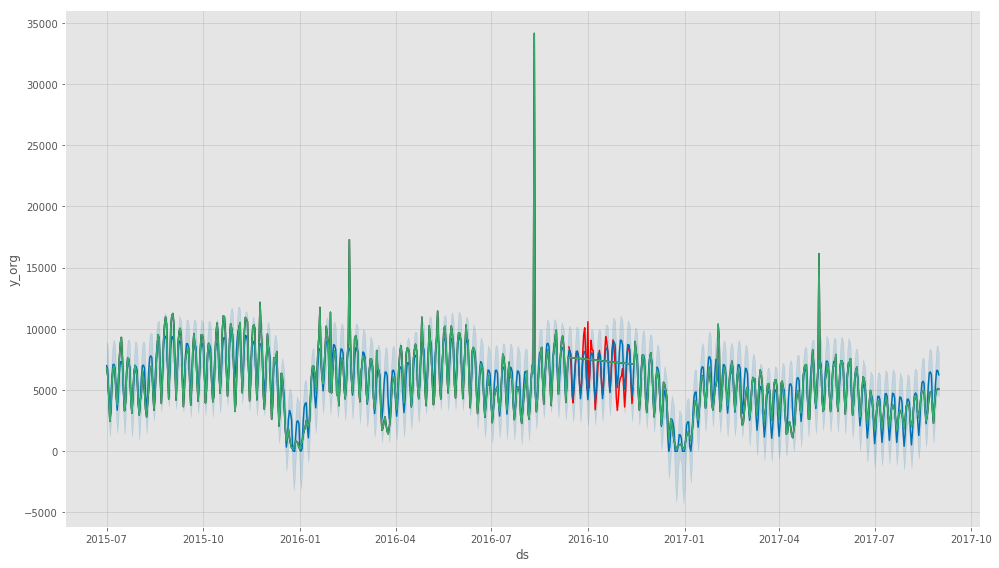

ds    2017-09-13  2017-09-14  2017-09-15  2017-09-16  2017-09-17  2017-09-18  \
3633      8513.0      8068.0      7028.0      4555.0      3948.0      5698.0   

ds    2017-09-19  2017-09-20  2017-09-21  2017-09-22     ...      2017-11-04  \
3633      6974.0      7971.0      8177.0      7708.0     ...          5283.0   

ds    2017-11-05  2017-11-06  2017-11-07  2017-11-08  2017-11-09  2017-11-10  \
3633      3616.0      4990.0      7330.0      8421.0      8681.0      7807.0   

ds    2017-11-11  2017-11-12  2017-11-13  
3633      5526.0      3901.0      5125.0  

[1 rows x 62 columns]
page_index            91743.000000
v7fy_train               14.232552
v7fy_val                 13.891040
v7f_train                13.629406
v7f_val                        NaN
prevYear_med_pred      4283.000000
prevYear_med_smape       38.996275
Ytest_gain               25.105235
rolling_gain_mean        19.346511
rolling_gain_std         12.947436
nans_start_to_120         0.000000
Name: 91743, dtype: flo

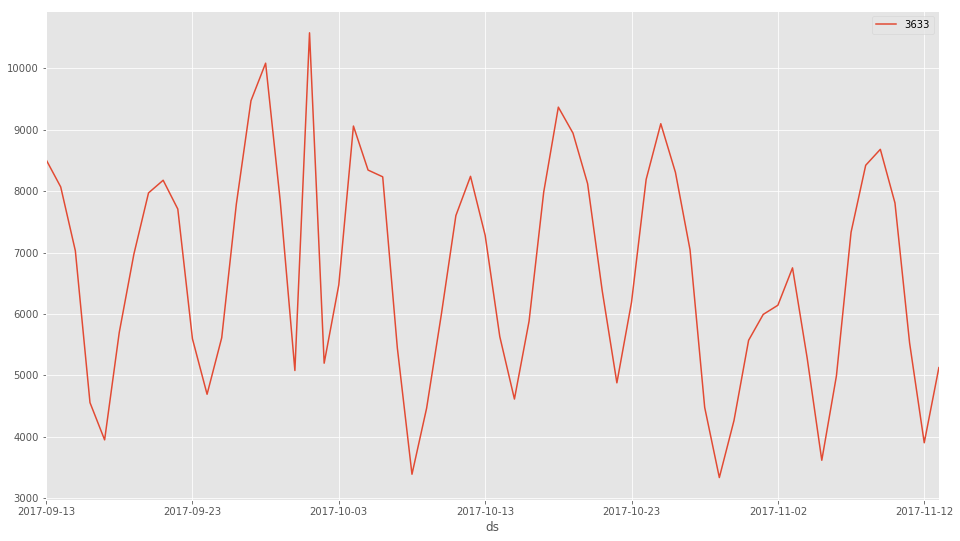

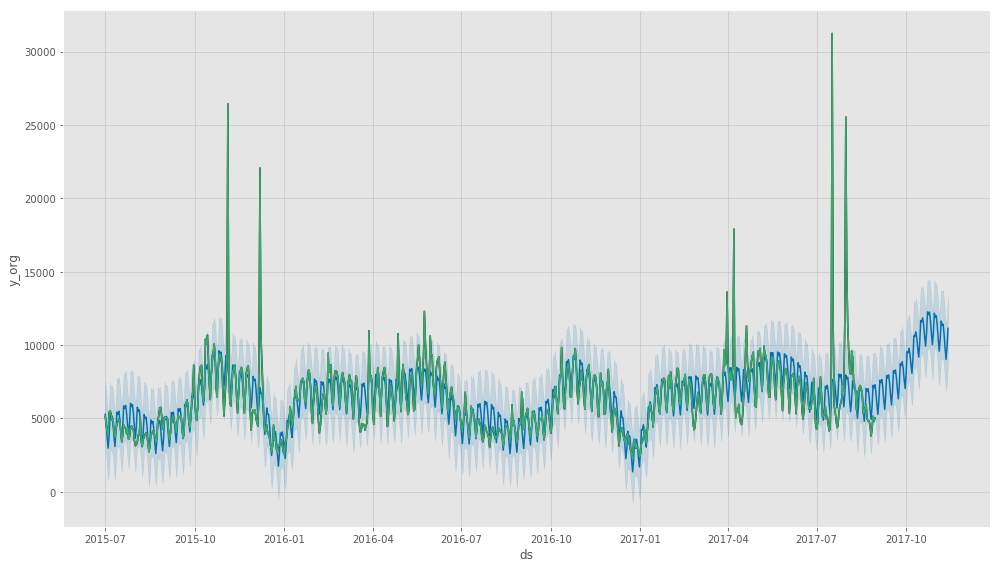

YVERSION 2017-08-31 00:00:00
YVERSION train == 0, ds.min() 2016-09-13 00:00:00
YVERSION train == 0, ds.max() 2016-11-13 00:00:00


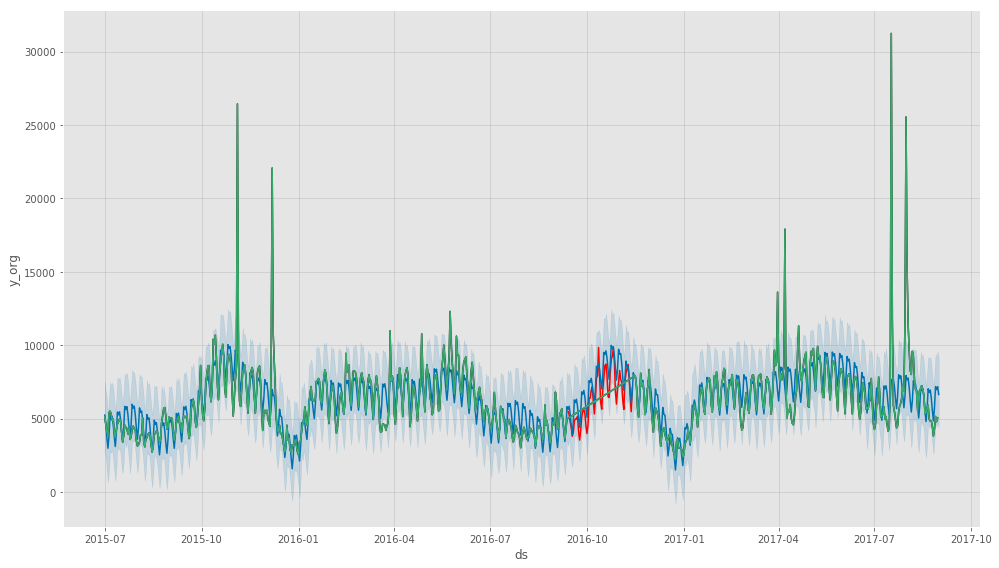

ds    2017-09-13  2017-09-14  2017-09-15  2017-09-16  2017-09-17  2017-09-18  \
4833      5489.0      5285.0      4771.0      4439.0      3797.0      4070.0   

ds    2017-09-19  2017-09-20  2017-09-21  2017-09-22     ...      2017-11-04  \
4833      4822.0      4991.0      4964.0      5156.0     ...          6207.0   

ds    2017-11-05  2017-11-06  2017-11-07  2017-11-08  2017-11-09  2017-11-10  \
4833      5626.0      7510.0      8065.0      8385.0      8677.0      7805.0   

ds    2017-11-11  2017-11-12  2017-11-13  
4833      6480.0      5474.0      7081.0  

[1 rows x 62 columns]
page_index            61873.000000
v7fy_train               15.871029
v7fy_val                 14.104988
v7f_train                15.813399
v7f_val                        NaN
prevYear_med_pred       302.000000
prevYear_med_smape       39.118540
Ytest_gain               25.013552
rolling_gain_mean        11.022089
rolling_gain_std          5.857667
nans_start_to_120         0.000000
Name: 61873, dtype: flo

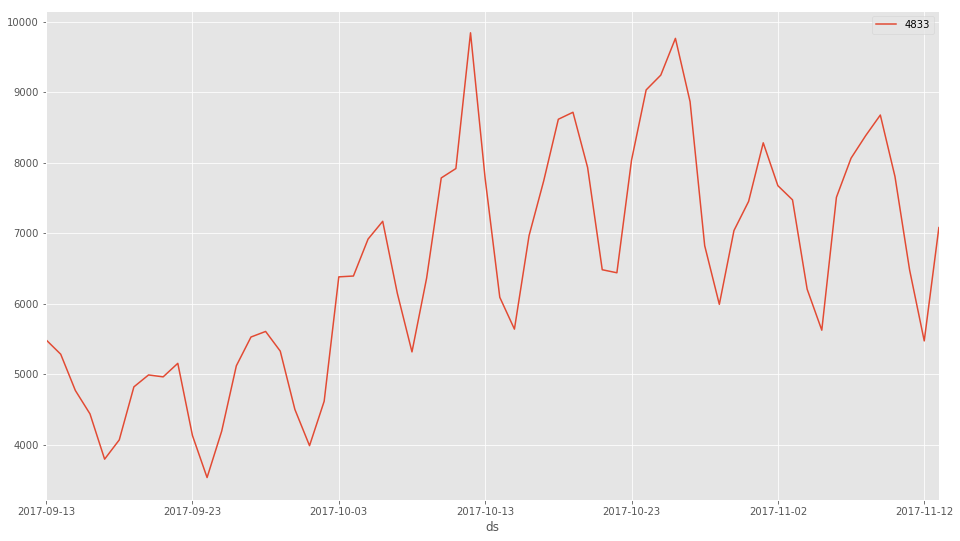

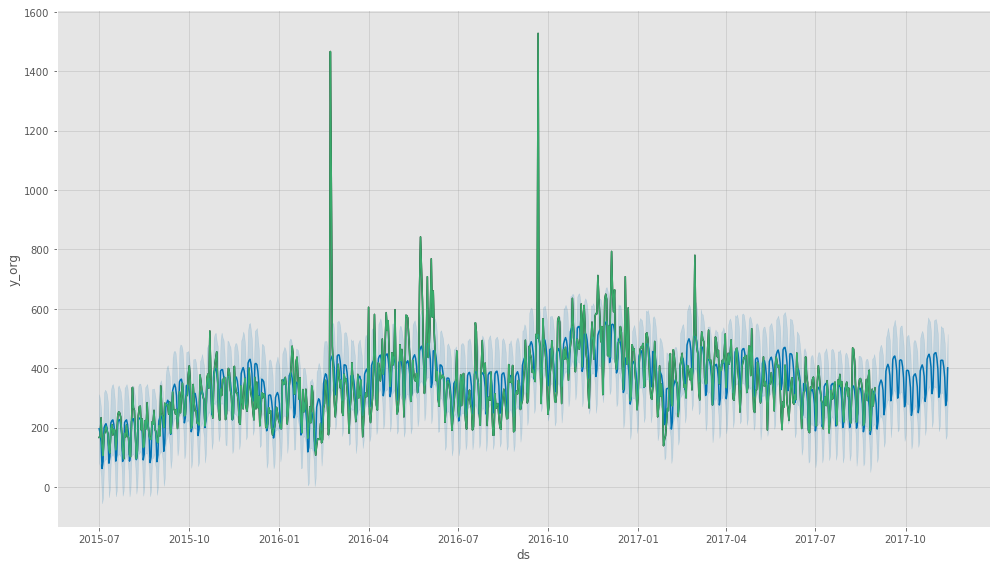

YVERSION 2017-08-31 00:00:00
YVERSION train == 0, ds.min() 2016-09-13 00:00:00
YVERSION train == 0, ds.max() 2016-11-13 00:00:00


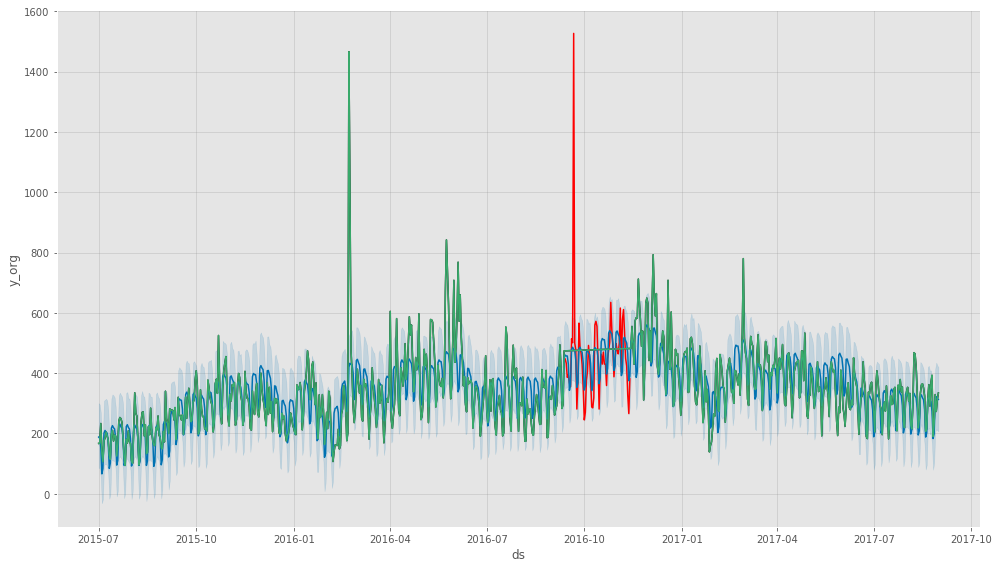

ds    2017-09-13  2017-09-14  2017-09-15  2017-09-16  2017-09-17  2017-09-18  \
2537       447.0       433.0       386.0       394.0       368.0       355.0   

ds    2017-09-19  2017-09-20  2017-09-21  2017-09-22     ...      2017-11-04  \
2537       514.0       501.0      1527.0       500.0     ...           616.0   

ds    2017-11-05  2017-11-06  2017-11-07  2017-11-08  2017-11-09  2017-11-10  \
2537       404.0       577.0       611.0       535.0       449.0       424.0   

ds    2017-11-11  2017-11-12  2017-11-13  
2537       328.0       266.0       381.0  

[1 rows x 62 columns]
page_index            67736.000000
v7fy_train               11.886871
v7fy_val                 18.036086
v7f_train                12.935949
v7f_val                        NaN
prevYear_med_pred       685.000000
prevYear_med_smape       33.150033
Ytest_gain               15.113947
rolling_gain_mean         9.784144
rolling_gain_std          4.279858
nans_start_to_120         0.000000
Name: 67736, dtype: flo

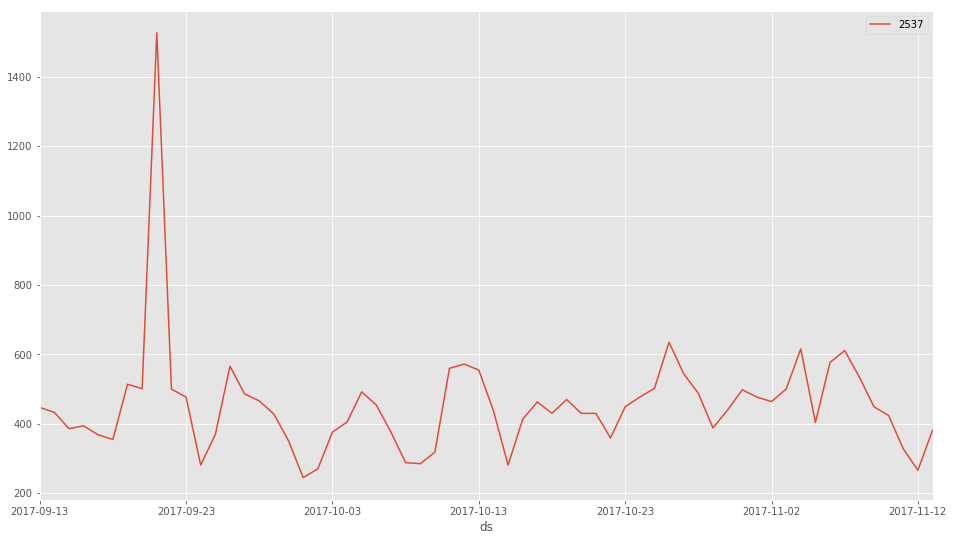

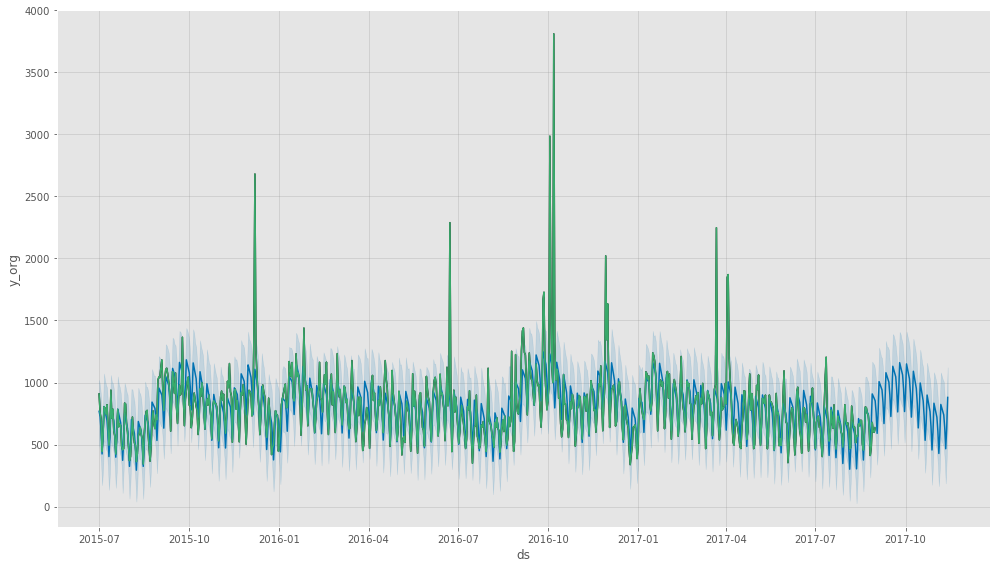

YVERSION 2017-08-31 00:00:00
YVERSION train == 0, ds.min() 2016-09-13 00:00:00
YVERSION train == 0, ds.max() 2016-11-13 00:00:00


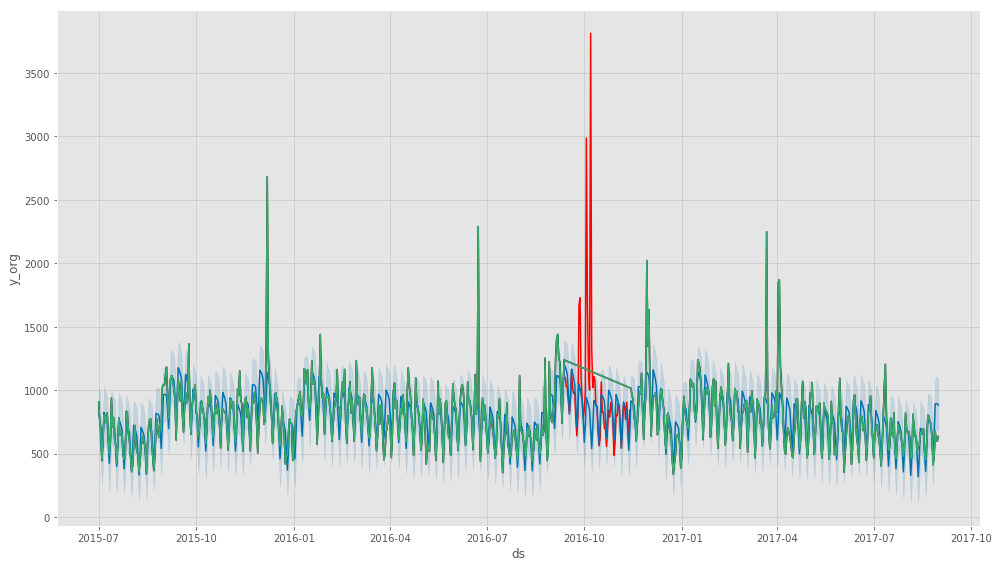

ds    2017-09-13  2017-09-14  2017-09-15  2017-09-16  2017-09-17  2017-09-18  \
2913      1099.0      1029.0      1018.0       910.0       818.0       925.0   

ds    2017-09-19  2017-09-20  2017-09-21  2017-09-22     ...      2017-11-04  \
2913      1150.0      1017.0       973.0       980.0     ...           707.0   

ds    2017-11-05  2017-11-06  2017-11-07  2017-11-08  2017-11-09  2017-11-10  \
2913       544.0       769.0       887.0       882.0       769.0       905.0   

ds    2017-11-11  2017-11-12  2017-11-13  
2913       763.0       580.0       844.0  

[1 rows x 62 columns]
page_index            72222.000000
v7fy_train               10.576396
v7fy_val                 10.938791
v7f_train                10.490730
v7f_val                        NaN
prevYear_med_pred      1202.000000
prevYear_med_smape       33.748111
Ytest_gain               22.809320
rolling_gain_mean        20.894856
rolling_gain_std          8.441981
nans_start_to_120         0.000000
Name: 72222, dtype: flo

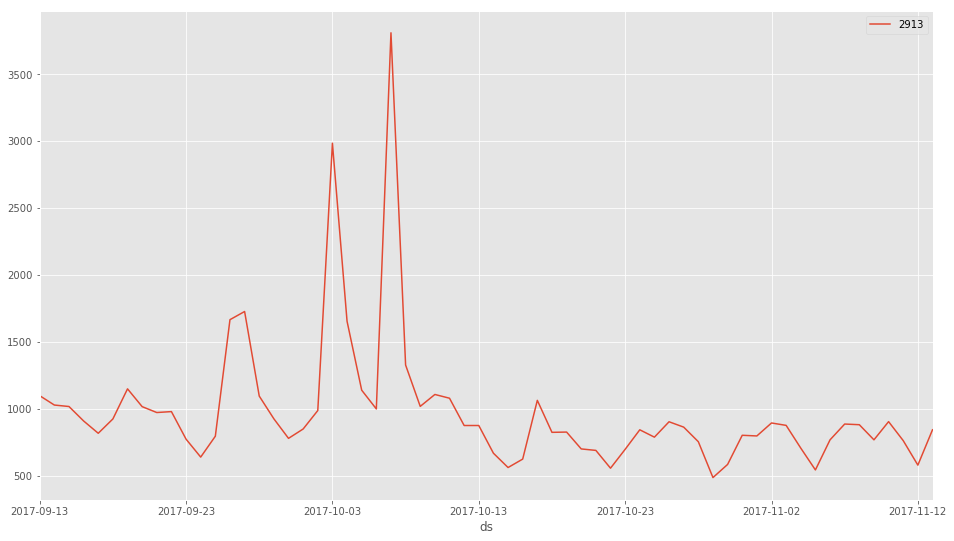

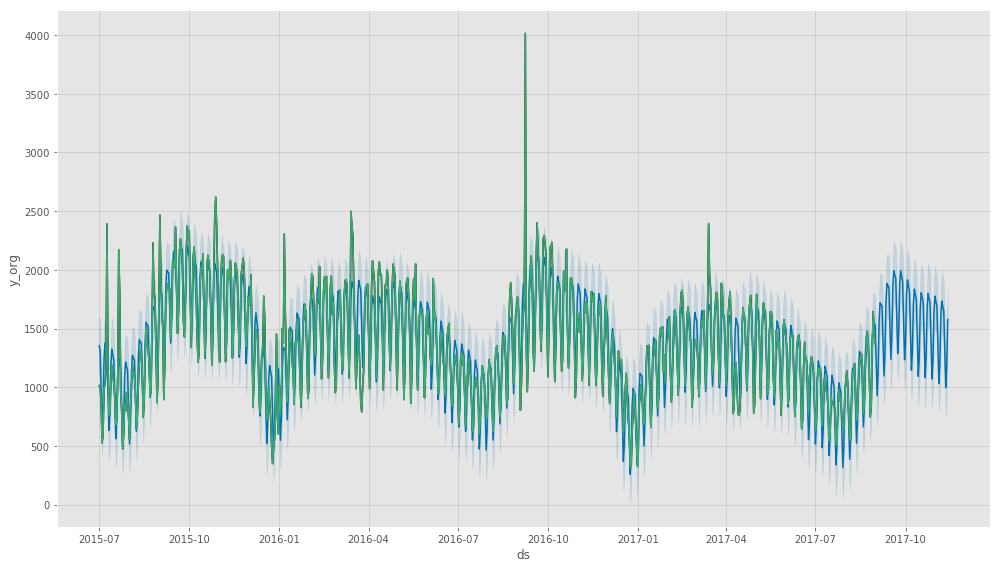

YVERSION 2017-08-31 00:00:00
YVERSION train == 0, ds.min() 2016-09-13 00:00:00
YVERSION train == 0, ds.max() 2016-11-13 00:00:00


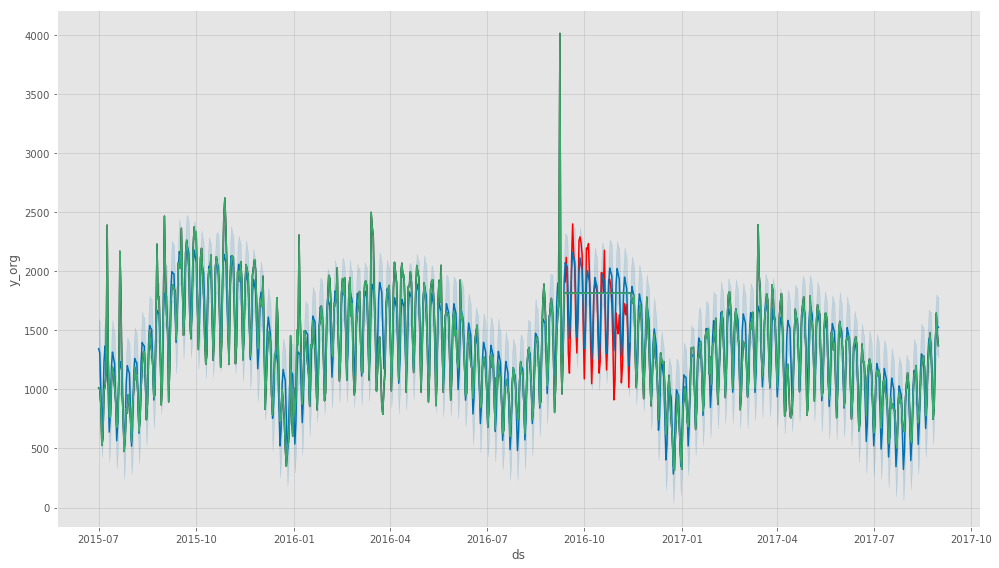

ds    2017-09-13  2017-09-14  2017-09-15  2017-09-16  2017-09-17  2017-09-18  \
4034      1910.0      2118.0      1884.0      1304.0      1138.0      1542.0   

ds    2017-09-19  2017-09-20  2017-09-21  2017-09-22     ...      2017-11-04  \
4034      2089.0      2401.0      2156.0      2030.0     ...          1408.0   

ds    2017-11-05  2017-11-06  2017-11-07  2017-11-08  2017-11-09  2017-11-10  \
4034      1056.0      1199.0      1626.0      1725.0      1633.0      1719.0   

ds    2017-11-11  2017-11-12  2017-11-13  
4034      1453.0      1017.0      1389.0  

[1 rows x 62 columns]
page_index            91075.000000
v7fy_train               26.132569
v7fy_val                 19.740212
v7f_train                26.294218
v7f_val                        NaN
prevYear_med_pred      1310.000000
prevYear_med_smape       56.096061
Ytest_gain               36.355849
rolling_gain_mean        30.759547
rolling_gain_std         15.648121
nans_start_to_120         0.000000
Name: 91075, dtype: flo

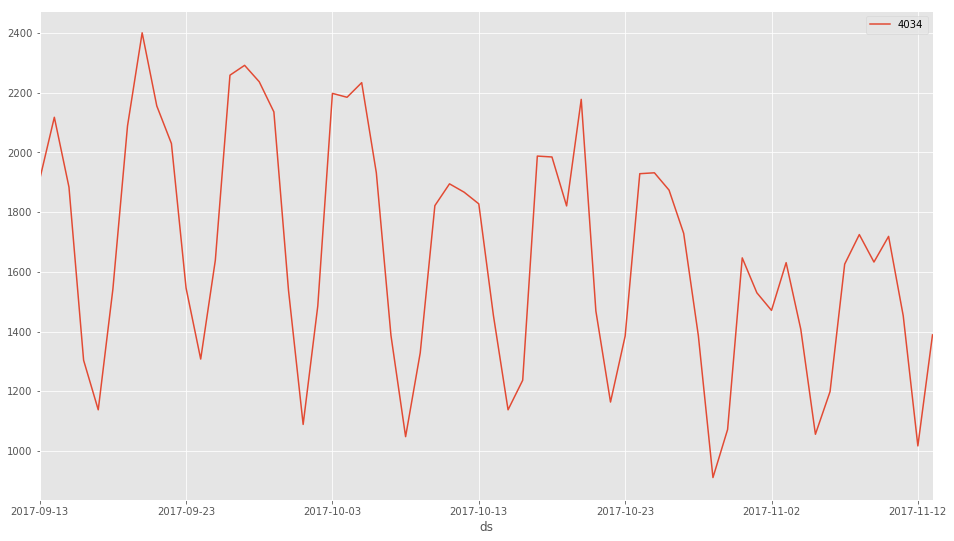

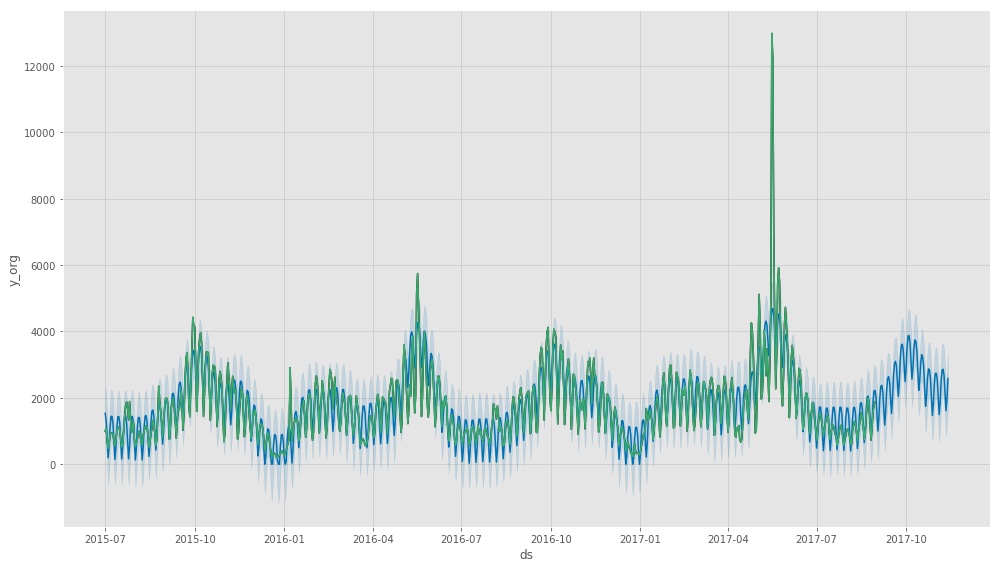

YVERSION 2017-08-31 00:00:00
YVERSION train == 0, ds.min() 2016-09-13 00:00:00
YVERSION train == 0, ds.max() 2016-11-13 00:00:00


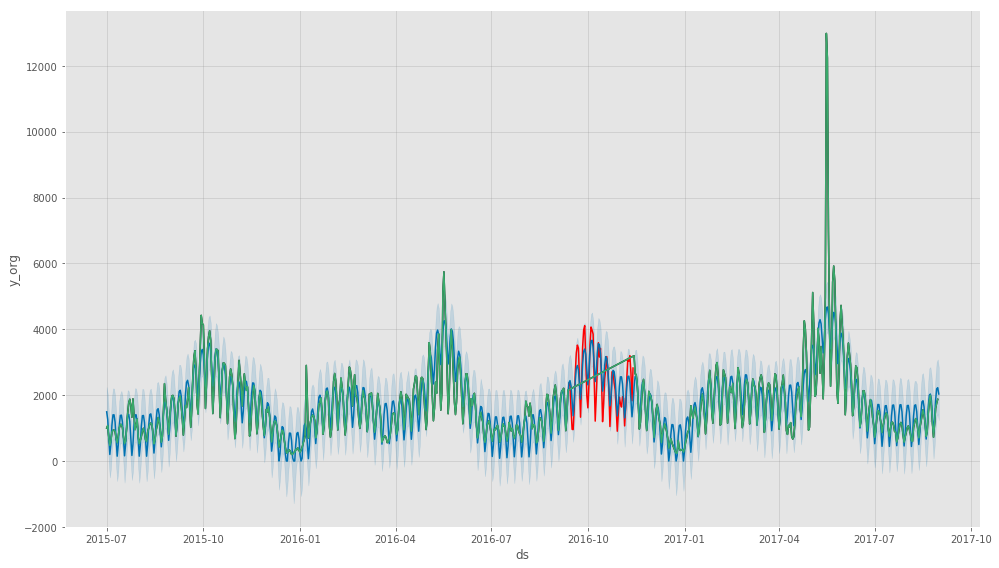

ds    2017-09-13  2017-09-14  2017-09-15  2017-09-16  2017-09-17  2017-09-18  \
4647      2364.0      2277.0      1562.0       964.0       954.0      1575.0   

ds    2017-09-19  2017-09-20  2017-09-21  2017-09-22     ...      2017-11-04  \
4647      2658.0      3284.0      3520.0      3430.0     ...          1900.0   

ds    2017-11-05  2017-11-06  2017-11-07  2017-11-08  2017-11-09  2017-11-10  \
4647      1066.0      1636.0      2483.0      3075.0      3032.0      3197.0   

ds    2017-11-11  2017-11-12  2017-11-13  
4647      2676.0      1829.0      2825.0  

[1 rows x 62 columns]
page_index            112151.000000
v7fy_train                16.144354
v7fy_val                  15.880735
v7f_train                 15.913608
v7f_val                         NaN
prevYear_med_pred         53.000000
prevYear_med_smape        36.456318
Ytest_gain                20.575583
rolling_gain_mean         14.535628
rolling_gain_std           7.021745
nans_start_to_120          0.000000
Name: 112151

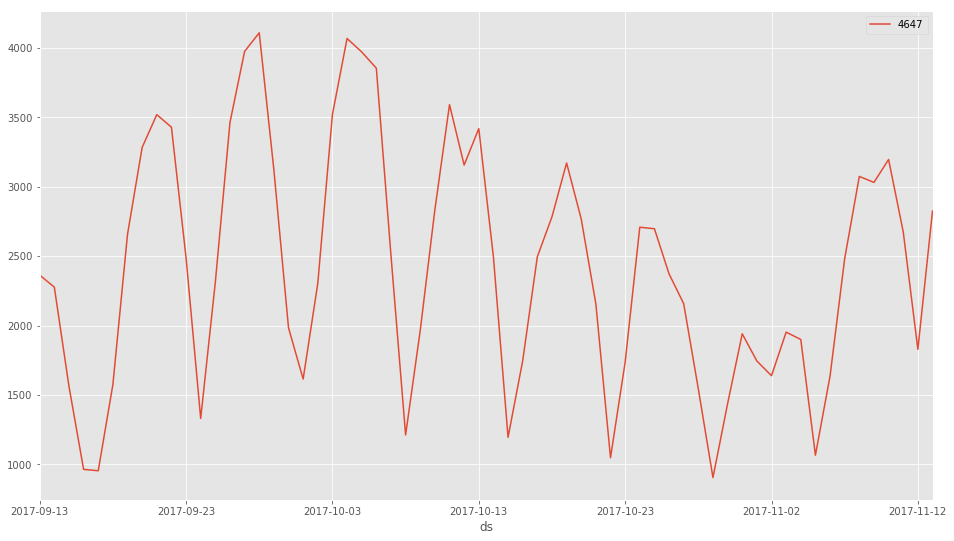

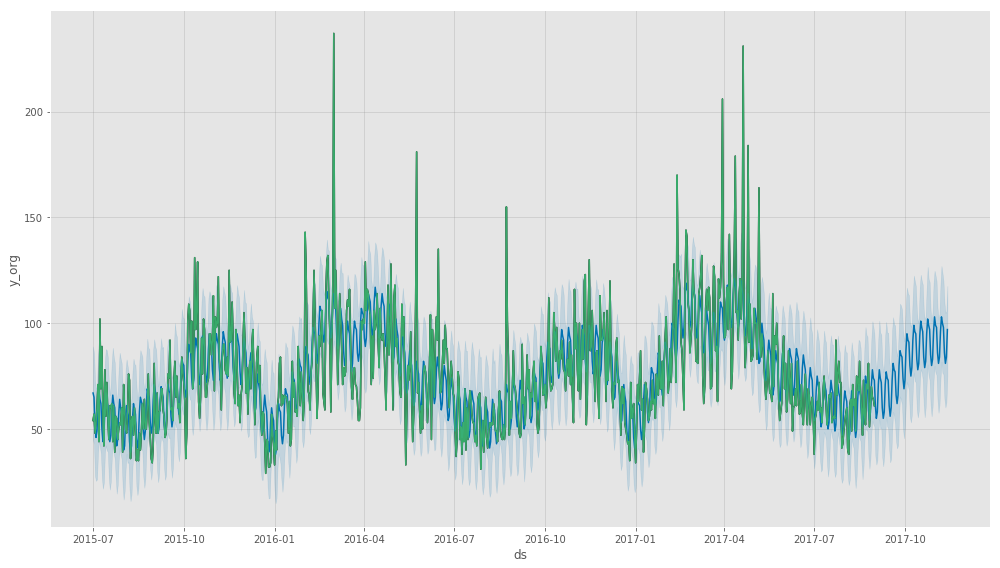

YVERSION 2017-08-31 00:00:00
YVERSION train == 0, ds.min() 2016-09-13 00:00:00
YVERSION train == 0, ds.max() 2016-11-13 00:00:00


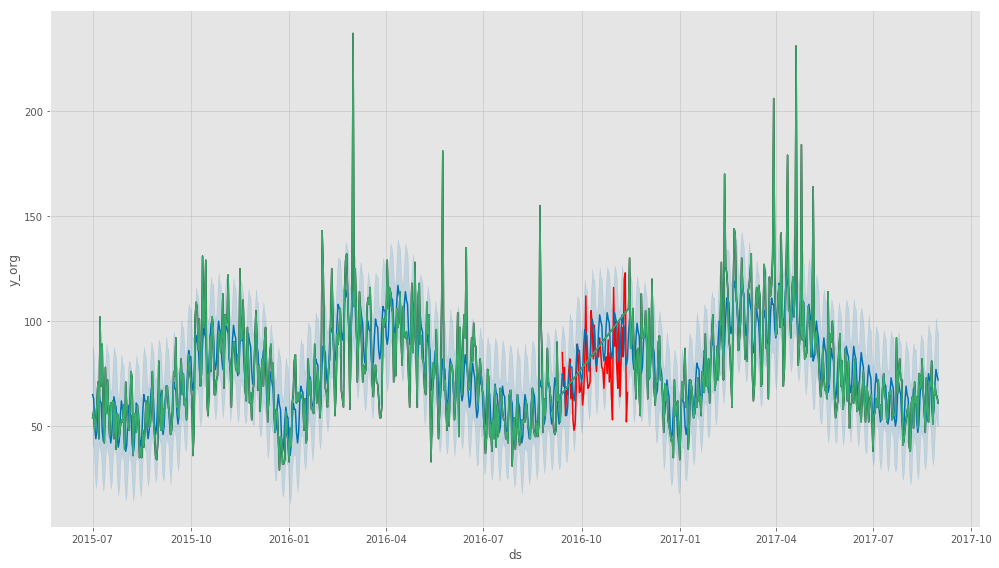

ds    2017-09-13  2017-09-14  2017-09-15  2017-09-16  2017-09-17  2017-09-18  \
7423        85.0        69.0        78.0        55.0        67.0        65.0   

ds    2017-09-19  2017-09-20  2017-09-21  2017-09-22     ...      2017-11-04  \
7423        76.0        82.0        63.0        72.0     ...            68.0   

ds    2017-11-05  2017-11-06  2017-11-07  2017-11-08  2017-11-09  2017-11-10  \
7423       100.0        64.0        80.0        97.0        83.0       120.0   

ds    2017-11-11  2017-11-12  2017-11-13  
7423       123.0        52.0        66.0  

[1 rows x 62 columns]
page_index            70929.000000
v7fy_train               24.194999
v7fy_val                 10.753553
v7f_train                22.889011
v7f_val                        NaN
prevYear_med_pred       722.000000
prevYear_med_smape       23.024835
Ytest_gain               12.271283
rolling_gain_mean        22.640641
rolling_gain_std         21.798307
nans_start_to_120         0.000000
Name: 70929, dtype: flo

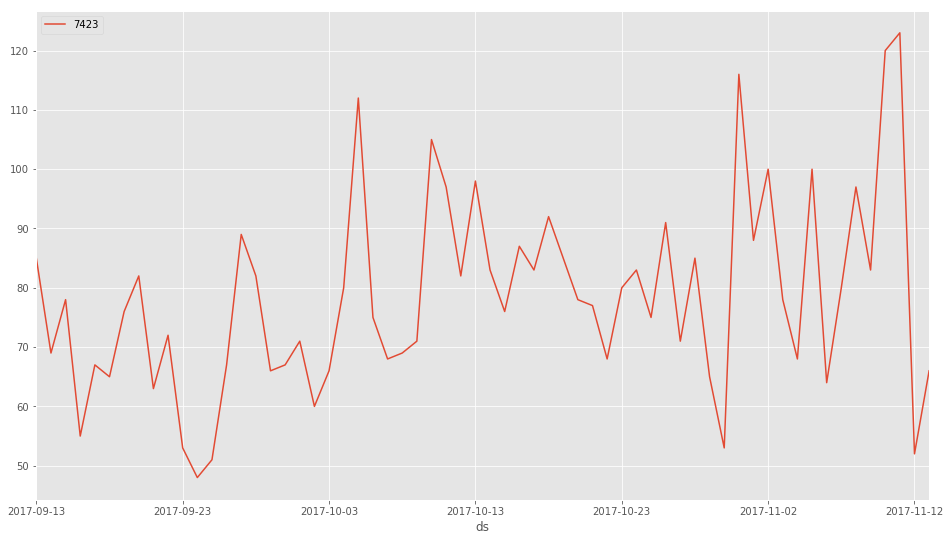

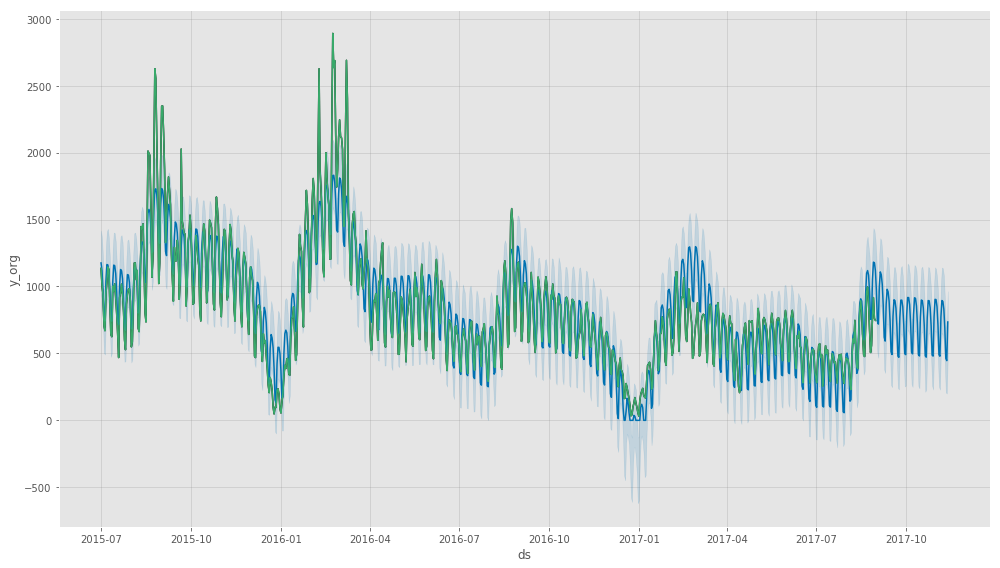

YVERSION 2017-08-31 00:00:00
YVERSION train == 0, ds.min() 2016-09-13 00:00:00
YVERSION train == 0, ds.max() 2016-11-13 00:00:00


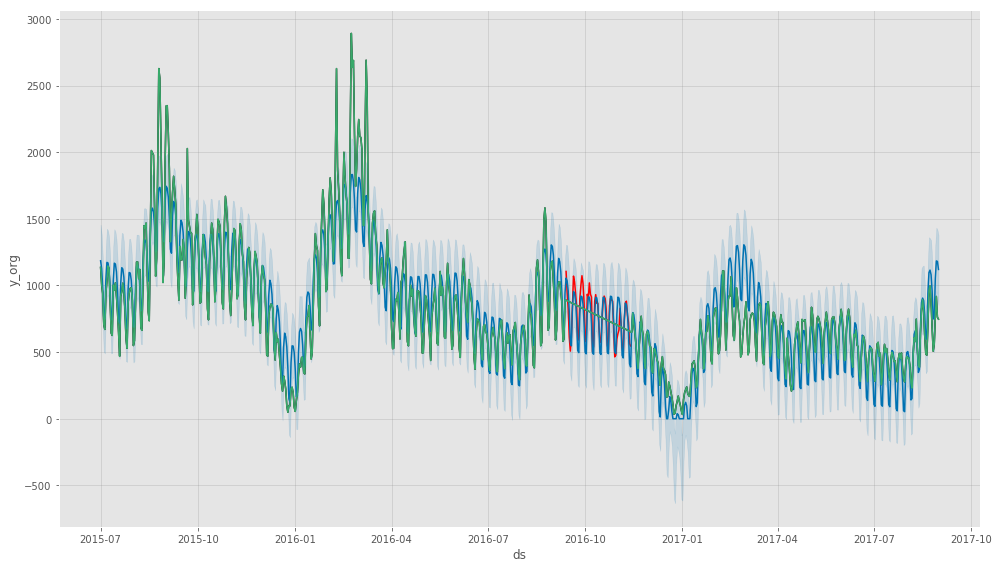

ds    2017-09-13  2017-09-14  2017-09-15  2017-09-16  2017-09-17  2017-09-18  \
3549      1105.0       948.0       825.0       611.0       507.0       611.0   

ds    2017-09-19  2017-09-20  2017-09-21  2017-09-22     ...      2017-11-04  \
3549       844.0      1070.0      1027.0       939.0     ...           710.0   

ds    2017-11-05  2017-11-06  2017-11-07  2017-11-08  2017-11-09  2017-11-10  \
3549       535.0       482.0       732.0       867.0       882.0       779.0   

ds    2017-11-11  2017-11-12  2017-11-13  
3549       722.0       564.0       546.0  

[1 rows x 62 columns]
page_index            18616.000000
v7fy_train               11.564751
v7fy_val                 19.135288
v7f_train                11.620675
v7f_val                        NaN
prevYear_med_pred       472.000000
prevYear_med_smape       43.040748
Ytest_gain               23.905460
rolling_gain_mean        11.190179
rolling_gain_std         11.081262
nans_start_to_120         0.000000
Name: 18616, dtype: flo

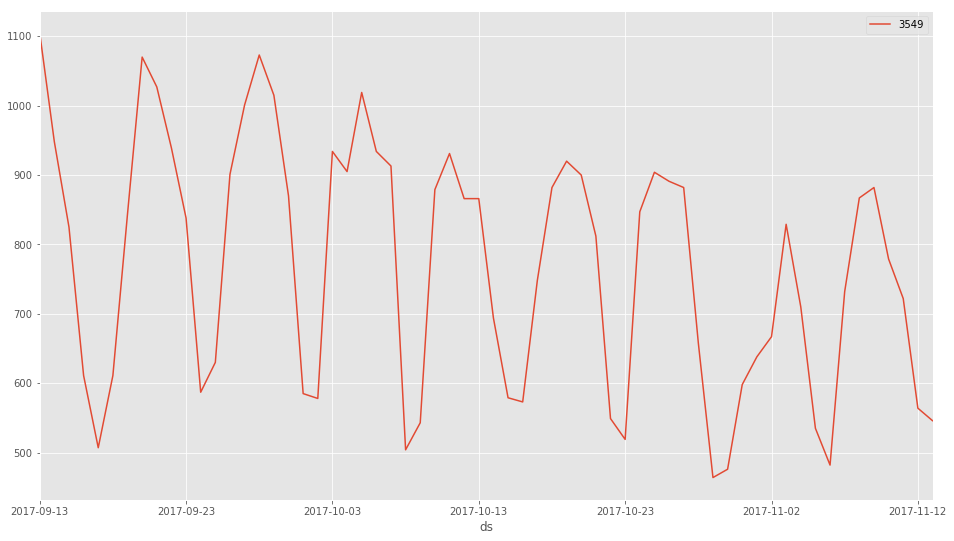

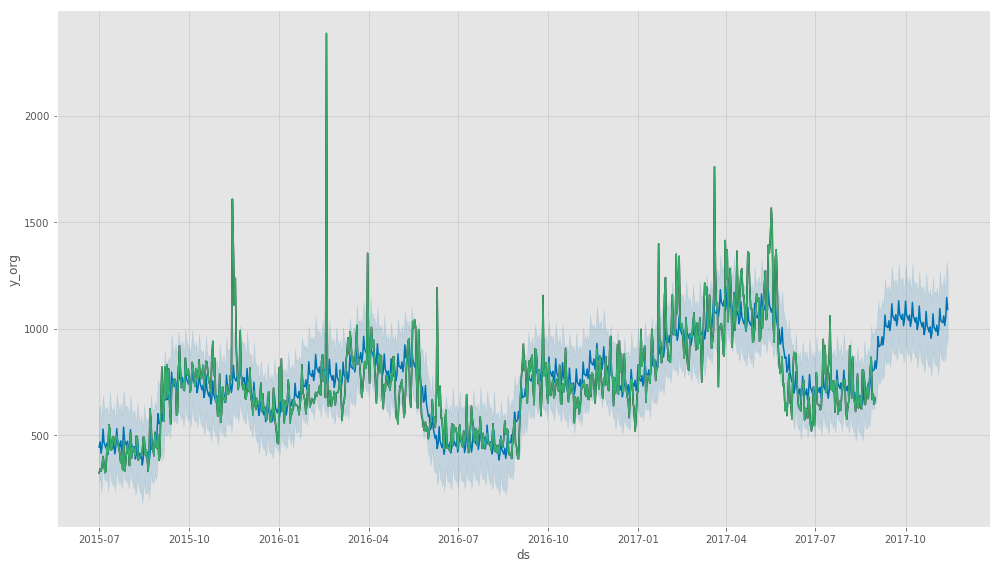

YVERSION 2017-08-31 00:00:00
YVERSION train == 0, ds.min() 2016-09-13 00:00:00
YVERSION train == 0, ds.max() 2016-11-13 00:00:00


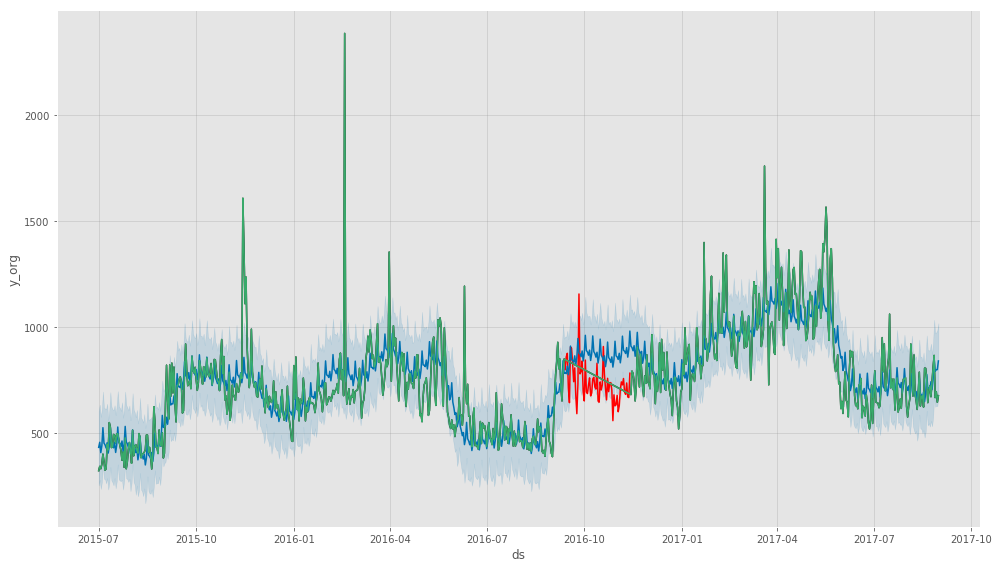

ds    2017-09-13  2017-09-14  2017-09-15  2017-09-16  2017-09-17  2017-09-18  \
1227       799.0       859.0       876.0       713.0       643.0       906.0   

ds    2017-09-19  2017-09-20  2017-09-21  2017-09-22     ...      2017-11-04  \
1227       900.0       828.0       742.0       807.0     ...           705.0   

ds    2017-11-05  2017-11-06  2017-11-07  2017-11-08  2017-11-09  2017-11-10  \
1227       741.0       727.0       757.0       693.0       682.0       736.0   

ds    2017-11-11  2017-11-12  2017-11-13  
1227       670.0       667.0       782.0  

[1 rows x 62 columns]


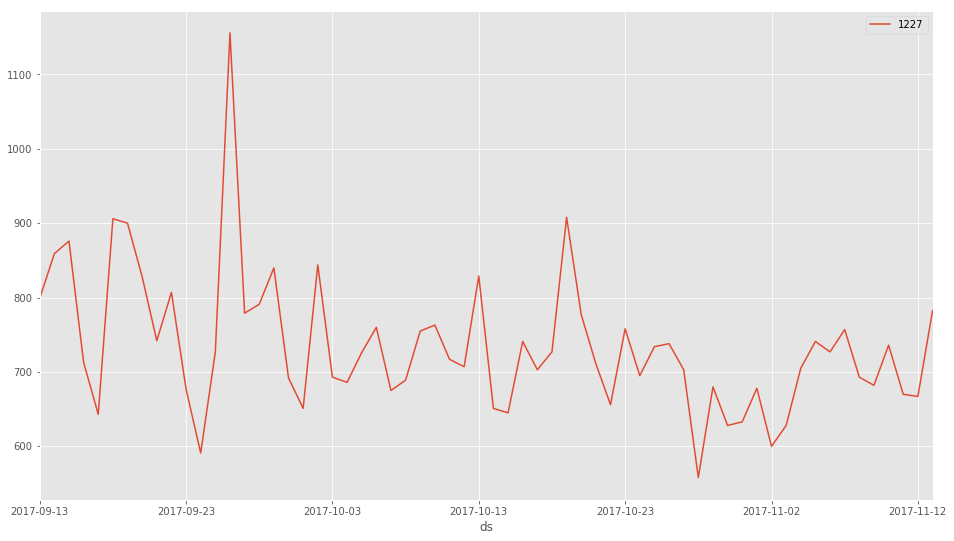

In [124]:
for row in df[filter_df].sample(10).iterrows():
    print(row[1])
    load_plot(str(int(row[1][0])))
    print(predictions[predictions.page_index == int(row[1][0])].iloc[:,1:])
    predictions[predictions.page_index == int(row[1][0])].iloc[:,1:].T.plot()